In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
from pathlib import Path

# check if workding_dir is in local variables
if "workding_dir" not in locals():
    workding_dir = str(Path.cwd().parent)

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/papers/rapget-translation


In [3]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /Users/inflaton/code/engd/papers/rapget-translation/.env


True

In [4]:
import os

model_name = os.getenv("MODEL_NAME")
adapter_name_or_path = os.getenv("ADAPTER_NAME_OR_PATH")
load_in_4bit = os.getenv("LOAD_IN_4BIT") == "true"
data_path = os.getenv("DATA_PATH")
results_path = "results/mac-results_fine_tuned.csv"  # os.getenv("RESULTS_PATH")
metrics_csv = results_path.replace(".csv", "_metrics.csv")
use_english_datasets = os.getenv("USE_ENGLISH_DATASETS") == "true"
max_new_tokens = int(os.getenv("MAX_NEW_TOKENS", 2048))
recalculate = os.getenv("RECALCULATE") == "true"

print("recalculate:", recalculate)

print(model_name, data_path, results_path, metrics_csv, max_new_tokens)

recalculate: True
Qwen/Qwen2-7B-Instruct datasets/mac/mac.tsv results/mac-results_fine_tuned.csv results/mac-results_fine_tuned_metrics.csv 300


In [5]:
import pandas as pd
from llm_toolkit.llm_utils import *
from llm_toolkit.translation_utils import *

df = pd.read_csv(results_path)
df.info()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/inflaton/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/inflaton/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/inflaton/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


loading: /Users/inflaton/code/engd/papers/rapget-translation/eval_modules/calc_repetitions.py
loading /Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/inflaton/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/inflaton/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/inflaton/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

Lightning automatically upgraded your loaded checkpoint from v1.8.3.post1 to v2.4.0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../../../../.cache/huggingface/hub/models--Unbabel--wmt22-comet-da/snapshots/371e9839ca4e213dde891b066cf3080f75ec7e72/checkpoints/model.ckpt`
Encoder model frozen.
/Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages/pytorch_lightning/core/saving.py:195: Found keys that are not in the model state dict but in the checkpoint: ['encoder.model.embeddings.position_ids']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 80 columns):
 #   Column                                                            Non-Null Count  Dtype 
---  ------                                                            --------------  ----- 
 0   chinese                                                           1133 non-null   object
 1   english                                                           1133 non-null   object
 2   internlm/internlm2_5-7b-chat/epochs-01                            1133 non-null   object
 3   Qwen/Qwen2-7B-Instruct/epochs-01                                  1133 non-null   object
 4   shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/epochs-01               1133 non-null   object
 5   shenzhi-wang/Llama3.1-8B-Chinese-Chat/epochs-01                   1133 non-null   object
 6   internlm/internlm2_5-7b-chat/epochs-02                            1133 non-null   object
 7   internlm/internlm2_5-7b-chat/epochs-03    

In [6]:
result_columns = [col for col in df.columns[2:].to_list() if "rpp" not in col and "shots" not in col]
result_columns.sort()
result_columns

['Qwen/Qwen2-72B-Instruct/epochs-01',
 'Qwen/Qwen2-72B-Instruct/epochs-02',
 'Qwen/Qwen2-72B-Instruct/epochs-03',
 'Qwen/Qwen2-72B-Instruct/epochs-04',
 'Qwen/Qwen2-72B-Instruct/epochs-05',
 'Qwen/Qwen2-72B-Instruct/epochs-06',
 'Qwen/Qwen2-7B-Instruct/epochs-01',
 'Qwen/Qwen2-7B-Instruct/epochs-02',
 'Qwen/Qwen2-7B-Instruct/epochs-03',
 'Qwen/Qwen2-7B-Instruct/epochs-04',
 'Qwen/Qwen2-7B-Instruct/epochs-05',
 'Qwen/Qwen2-7B-Instruct/epochs-06',
 'internlm/internlm2_5-7b-chat/epochs-01',
 'internlm/internlm2_5-7b-chat/epochs-02',
 'internlm/internlm2_5-7b-chat/epochs-03',
 'internlm/internlm2_5-7b-chat/epochs-04',
 'internlm/internlm2_5-7b-chat/epochs-05',
 'internlm/internlm2_5-7b-chat/epochs-06',
 'microsoft/Phi-3.5-mini-instruct/epochs-01',
 'microsoft/Phi-3.5-mini-instruct/epochs-02',
 'microsoft/Phi-3.5-mini-instruct/epochs-03',
 'microsoft/Phi-3.5-mini-instruct/epochs-04',
 'microsoft/Phi-3.5-mini-instruct/epochs-05',
 'microsoft/Phi-3.5-mini-instruct/epochs-06',
 'shenzhi-wang/L

In [7]:
df_openai = pd.read_csv("results/mac-results_few_shots_openai.csv")
df_openai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   chinese                1133 non-null   object
 1   english                1133 non-null   object
 2   gpt-4o-mini/shots-00   1133 non-null   object
 3   gpt-4o-mini/shots-01   1133 non-null   object
 4   gpt-4o-mini/shots-03   1133 non-null   object
 5   gpt-4o-mini/shots-05   1133 non-null   object
 6   gpt-4o-mini/shots-10   1133 non-null   object
 7   gpt-4o-mini/shots-50   1133 non-null   object
 8   gpt-4o/shots-00        1133 non-null   object
 9   gpt-4o/shots-01        1133 non-null   object
 10  gpt-4o/shots-03        1133 non-null   object
 11  gpt-4o/shots-05        1133 non-null   object
 12  gpt-4o/shots-10        1133 non-null   object
 13  gpt-4o/shots-50        1133 non-null   object
 14  gpt-4o-mini/epochs-01  1133 non-null   object
 15  gpt-4o-mini/epochs-02

In [8]:
openai_cols = df_openai.columns[2:].tolist()
openai_cols = [col for col in openai_cols if "epochs" in col]
openai_cols

['gpt-4o-mini/epochs-01',
 'gpt-4o-mini/epochs-02',
 'gpt-4o-mini/epochs-03',
 'gpt-4o-mini/epochs-04',
 'gpt-4o-mini/epochs-05',
 'gpt-4o-mini/epochs-06',
 'gpt-4o/epochs-01',
 'gpt-4o/epochs-02',
 'gpt-4o/epochs-03',
 'gpt-4o/epochs-04',
 'gpt-4o/epochs-05']

In [9]:
columns = df.columns[:2].to_list() + result_columns
df = df[columns]
df[openai_cols] = df_openai[openai_cols]
columns = df.columns.to_list()
result_columns = df.columns[2:].to_list()
result_columns, columns

(['Qwen/Qwen2-72B-Instruct/epochs-01',
  'Qwen/Qwen2-72B-Instruct/epochs-02',
  'Qwen/Qwen2-72B-Instruct/epochs-03',
  'Qwen/Qwen2-72B-Instruct/epochs-04',
  'Qwen/Qwen2-72B-Instruct/epochs-05',
  'Qwen/Qwen2-72B-Instruct/epochs-06',
  'Qwen/Qwen2-7B-Instruct/epochs-01',
  'Qwen/Qwen2-7B-Instruct/epochs-02',
  'Qwen/Qwen2-7B-Instruct/epochs-03',
  'Qwen/Qwen2-7B-Instruct/epochs-04',
  'Qwen/Qwen2-7B-Instruct/epochs-05',
  'Qwen/Qwen2-7B-Instruct/epochs-06',
  'internlm/internlm2_5-7b-chat/epochs-01',
  'internlm/internlm2_5-7b-chat/epochs-02',
  'internlm/internlm2_5-7b-chat/epochs-03',
  'internlm/internlm2_5-7b-chat/epochs-04',
  'internlm/internlm2_5-7b-chat/epochs-05',
  'internlm/internlm2_5-7b-chat/epochs-06',
  'microsoft/Phi-3.5-mini-instruct/epochs-01',
  'microsoft/Phi-3.5-mini-instruct/epochs-02',
  'microsoft/Phi-3.5-mini-instruct/epochs-03',
  'microsoft/Phi-3.5-mini-instruct/epochs-04',
  'microsoft/Phi-3.5-mini-instruct/epochs-05',
  'microsoft/Phi-3.5-mini-instruct/epoc

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 55 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   chinese                                              1133 non-null   object
 1   english                                              1133 non-null   object
 2   Qwen/Qwen2-72B-Instruct/epochs-01                    1133 non-null   object
 3   Qwen/Qwen2-72B-Instruct/epochs-02                    1133 non-null   object
 4   Qwen/Qwen2-72B-Instruct/epochs-03                    1133 non-null   object
 5   Qwen/Qwen2-72B-Instruct/epochs-04                    1133 non-null   object
 6   Qwen/Qwen2-72B-Instruct/epochs-05                    1133 non-null   object
 7   Qwen/Qwen2-72B-Instruct/epochs-06                    1133 non-null   object
 8   Qwen/Qwen2-7B-Instruct/epochs-01                     1133 non-null   object
 9

In [11]:
%%time

variant = "epochs"
if recalculate:
    metrics_df = None
else:
    metrics_df = pd.read_csv(metrics_csv)

metrics_df = get_metrics(
    df,
    max_output_tokens=max_new_tokens,
    variant=variant,
    existing_metrics_df=metrics_df,
)
metrics_df

['Qwen/Qwen2-72B-Instruct' 'Qwen/Qwen2-7B-Instruct'
 'internlm/internlm2_5-7b-chat' 'microsoft/Phi-3.5-mini-instruct'
 'shenzhi-wang/Llama3.1-70B-Chinese-Chat'
 'shenzhi-wang/Llama3.1-8B-Chinese-Chat'
 'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat' 'gpt-4o-mini' 'gpt-4o']


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Calculating metrics for Qwen/Qwen2-72B-Instruct/epochs-01


/Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Using default tokenizer.


Qwen/Qwen2-72B-Instruct/epochs-01: {'comet': 0.7551729800894738, 'meteor': 0.4689894616957893, 'sacrebleu': {'score': 18.065844028552757, 'counts': [14500, 6569, 3558, 2049], 'totals': [27672, 26539, 25408, 24278], 'precisions': [52.39953743856606, 24.75225140359471, 14.003463476070529, 8.43973968201664], 'bp': 0.9130227260435708, 'sys_len': 27672, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.18065844028552755, 'precisions': [0.5239953743856606, 0.2475225140359471, 0.1400346347607053, 0.0843973968201664], 'brevity_penalty': 0.9130227260435708, 'length_ratio': 0.9165948989731699, 'translation_length': 27672, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.5030782135341632, 'rouge2': 0.2610212074422378, 'rougeL': 0.4478251162389901, 'rougeLsum': 0.44723368273524217}, 'accuracy': 0.01412180052956752, 'correct_ids': [77, 193, 199, 240, 309, 348, 364, 413, 526, 531, 533, 567, 712, 778, 893, 1011]}


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Calculating metrics for Qwen/Qwen2-72B-Instruct/epochs-02


/Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Using default tokenizer.


Qwen/Qwen2-72B-Instruct/epochs-02: {'comet': 0.7564419440642355, 'meteor': 0.47754228179210856, 'sacrebleu': {'score': 18.979032398968382, 'counts': [14706, 6813, 3790, 2225], 'totals': [28314, 27181, 26049, 24920], 'precisions': [51.938970120788305, 25.065302968985687, 14.549502859994625, 8.928571428571429], 'bp': 0.9358903326437779, 'sys_len': 28314, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.1897903239896837, 'precisions': [0.5193897012078831, 0.25065302968985687, 0.14549502859994626, 0.08928571428571429], 'brevity_penalty': 0.9358903326437776, 'length_ratio': 0.9378602186154356, 'translation_length': 28314, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.5038610091232971, 'rouge2': 0.26570521198096875, 'rougeL': 0.45174814994427165, 'rougeLsum': 0.45152596318651506}, 'accuracy': 0.01500441306266549, 'correct_ids': [41, 77, 133, 193, 199, 272, 348, 364, 413, 526, 567, 658, 712, 778, 893, 952, 1011]}


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Calculating metrics for Qwen/Qwen2-72B-Instruct/epochs-03


/Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Using default tokenizer.


Qwen/Qwen2-72B-Instruct/epochs-03: {'comet': 0.7474586262917582, 'meteor': 0.4630538297359702, 'sacrebleu': {'score': 18.06621920796414, 'counts': [14420, 6497, 3562, 2079], 'totals': [28318, 27185, 26054, 24926], 'precisions': [50.92167525955223, 23.89920912267795, 13.671605127811468, 8.340688437775816], 'bp': 0.9360312994842176, 'sys_len': 28318, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.18066219207964138, 'precisions': [0.5092167525955222, 0.23899209122677947, 0.13671605127811468, 0.08340688437775816], 'brevity_penalty': 0.9360312994842176, 'length_ratio': 0.9379927128188141, 'translation_length': 28318, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.4917558869305224, 'rouge2': 0.2518225739592377, 'rougeL': 0.4366218943568002, 'rougeLsum': 0.4363726979812669}, 'accuracy': 0.01147396293027361, 'correct_ids': [41, 133, 147, 193, 199, 348, 413, 526, 567, 658, 733, 778, 1011]}


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Calculating metrics for Qwen/Qwen2-72B-Instruct/epochs-04


/Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Using default tokenizer.


Qwen/Qwen2-72B-Instruct/epochs-04: {'comet': 0.7435304695067949, 'meteor': 0.4540356277225138, 'sacrebleu': {'score': 16.97559317225705, 'counts': [14256, 6165, 3276, 1882], 'totals': [29217, 28084, 26953, 25825], 'precisions': [48.793510627374474, 21.952001139438828, 12.15449115126331, 7.287512100677638], 'bp': 0.9672458950501656, 'sys_len': 29217, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.16975593172257047, 'precisions': [0.48793510627374476, 0.21952001139438826, 0.12154491151263311, 0.07287512100677639], 'brevity_penalty': 0.9672458950501656, 'length_ratio': 0.9677707850281551, 'translation_length': 29217, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.480831629210974, 'rouge2': 0.2392228823327442, 'rougeL': 0.4229607279653256, 'rougeLsum': 0.4228279420551401}, 'accuracy': 0.01323918799646955, 'correct_ids': [41, 133, 147, 193, 199, 272, 309, 348, 413, 526, 571, 658, 659, 778, 1011]}


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Calculating metrics for Qwen/Qwen2-72B-Instruct/epochs-05


/Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Using default tokenizer.


Qwen/Qwen2-72B-Instruct/epochs-05: {'comet': 0.7365262865336302, 'meteor': 0.4413334061070922, 'sacrebleu': {'score': 16.09060935737309, 'counts': [13950, 5849, 3064, 1755], 'totals': [29781, 28648, 27517, 26390], 'precisions': [46.841946207313384, 20.416783021502372, 11.134934767598212, 6.650246305418719], 'bp': 0.9863602869568671, 'sys_len': 29781, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.16090609357373092, 'precisions': [0.4684194620731339, 0.20416783021502374, 0.11134934767598212, 0.0665024630541872], 'brevity_penalty': 0.9863602869568671, 'length_ratio': 0.9864524677045379, 'translation_length': 29781, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.4673133361130628, 'rouge2': 0.2300608034198241, 'rougeL': 0.4087756120312607, 'rougeLsum': 0.4086779303199767}, 'accuracy': 0.01235657546337158, 'correct_ids': [41, 133, 147, 199, 309, 348, 364, 413, 526, 571, 658, 659, 778, 1011]}


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Calculating metrics for Qwen/Qwen2-72B-Instruct/epochs-06


/Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Using default tokenizer.


Qwen/Qwen2-72B-Instruct/epochs-06: {'comet': 0.7353102517859239, 'meteor': 0.4392735223455487, 'sacrebleu': {'score': 15.615747677467777, 'counts': [13896, 5707, 2944, 1669], 'totals': [29956, 28823, 27692, 26564], 'precisions': [46.3880357858192, 19.80015959476807, 10.631229235880399, 6.282939316368017], 'bp': 0.9922189733392507, 'sys_len': 29956, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.15615747677467776, 'precisions': [0.46388035785819204, 0.19800159594768066, 0.10631229235880399, 0.06282939316368016], 'brevity_penalty': 0.9922189733392507, 'length_ratio': 0.9922490891023518, 'translation_length': 29956, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.4641992654378919, 'rouge2': 0.2275218359429585, 'rougeL': 0.40745123357128776, 'rougeLsum': 0.4073261138215911}, 'accuracy': 0.01323918799646955, 'correct_ids': [41, 133, 147, 199, 272, 309, 348, 364, 413, 526, 571, 658, 659, 778, 1011]}


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Calculating metrics for Qwen/Qwen2-7B-Instruct/epochs-01


/Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Using default tokenizer.


Qwen/Qwen2-7B-Instruct/epochs-01: {'comet': 0.7319349497162128, 'meteor': 0.4067704621958429, 'sacrebleu': {'score': 13.127239146658308, 'counts': [12943, 5069, 2395, 1237], 'totals': [26933, 25800, 24669, 23540], 'precisions': [48.05628782534437, 19.647286821705425, 9.708541083951518, 5.254885301614274], 'bp': 0.8860962371419981, 'sys_len': 26933, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.13127239146658307, 'precisions': [0.48056287825344374, 0.19647286821705426, 0.09708541083951518, 0.05254885301614273], 'brevity_penalty': 0.8860962371419981, 'length_ratio': 0.8921165948989732, 'translation_length': 26933, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.4469317194683569, 'rouge2': 0.2017592022337435, 'rougeL': 0.3921159313570036, 'rougeLsum': 0.39231636326132935}, 'accuracy': 0.01059135039717564, 'correct_ids': [77, 240, 272, 348, 364, 533, 567, 659, 668, 778, 893, 1011]}


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Calculating metrics for Qwen/Qwen2-7B-Instruct/epochs-02


/Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Using default tokenizer.


Qwen/Qwen2-7B-Instruct/epochs-02: {'comet': 0.737780632903275, 'meteor': 0.4276774030251161, 'sacrebleu': {'score': 14.78245961900422, 'counts': [13675, 5601, 2754, 1475], 'totals': [28871, 27738, 26605, 25474], 'precisions': [47.36586886495099, 20.19251568245728, 10.351437699680512, 5.790217476642852], 'bp': 0.9553419091969785, 'sys_len': 28871, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.14782459619004226, 'precisions': [0.4736586886495099, 0.2019251568245728, 0.10351437699680512, 0.05790217476642852], 'brevity_penalty': 0.9553419091969785, 'length_ratio': 0.956310036435906, 'translation_length': 28871, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.4627748038209907, 'rouge2': 0.22069019331696094, 'rougeL': 0.4088083530471618, 'rougeLsum': 0.40874739999907783}, 'accuracy': 0.01235657546337158, 'correct_ids': [77, 240, 272, 348, 364, 533, 567, 617, 658, 659, 778, 813, 893, 1011]}


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Calculating metrics for Qwen/Qwen2-7B-Instruct/epochs-03


/Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Using default tokenizer.


Qwen/Qwen2-7B-Instruct/epochs-03: {'comet': 0.74741127859515, 'meteor': 0.4440963225595562, 'sacrebleu': {'score': 15.514758216718183, 'counts': [13927, 5799, 2919, 1602], 'totals': [28976, 27843, 26711, 25580], 'precisions': [48.06391496410823, 20.827497036957226, 10.928082063569317, 6.262705238467553], 'bp': 0.9589687965342737, 'sys_len': 28976, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.15514758216718177, 'precisions': [0.4806391496410823, 0.20827497036957224, 0.10928082063569317, 0.06262705238467553], 'brevity_penalty': 0.9589687965342737, 'length_ratio': 0.9597880092745943, 'translation_length': 28976, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.4745099055761247, 'rouge2': 0.2298682766793896, 'rougeL': 0.4189745467842307, 'rougeLsum': 0.41889668124848867}, 'accuracy': 0.01412180052956752, 'correct_ids': [41, 77, 133, 137, 193, 240, 272, 348, 419, 533, 567, 658, 659, 778, 813, 893]}


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Calculating metrics for Qwen/Qwen2-7B-Instruct/epochs-04


/Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Using default tokenizer.


Qwen/Qwen2-7B-Instruct/epochs-04: {'comet': 0.7445180667835531, 'meteor': 0.4401384600160434, 'sacrebleu': {'score': 15.217826677227528, 'counts': [13811, 5707, 2847, 1556], 'totals': [28316, 27183, 26050, 24918], 'precisions': [48.77454442717898, 20.9947393591583, 10.928982725527831, 6.24448190063408], 'bp': 0.9359608183884329, 'sys_len': 28316, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.1521782667722753, 'precisions': [0.4877454442717898, 0.209947393591583, 0.1092898272552783, 0.062444819006340795], 'brevity_penalty': 0.935960818388433, 'length_ratio': 0.9379264657171249, 'translation_length': 28316, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.4739171723099256, 'rouge2': 0.2274565922631453, 'rougeL': 0.41604522631630736, 'rougeLsum': 0.4161626794617163}, 'accuracy': 0.01323918799646955, 'correct_ids': [41, 77, 133, 193, 199, 240, 272, 348, 533, 534, 567, 658, 659, 778, 893]}


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Calculating metrics for Qwen/Qwen2-7B-Instruct/epochs-05


/Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Using default tokenizer.


Qwen/Qwen2-7B-Instruct/epochs-05: {'comet': 0.7390702013830537, 'meteor': 0.43567484838054477, 'sacrebleu': {'score': 14.823012985329118, 'counts': [13674, 5605, 2773, 1480], 'totals': [28801, 27668, 26536, 25406], 'precisions': [47.47751814173119, 20.258059852537226, 10.449954778414229, 5.8253955758482245], 'bp': 0.9529169813315106, 'sys_len': 28801, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.14823012985329123, 'precisions': [0.4747751814173119, 0.20258059852537227, 0.10449954778414229, 0.058253955758482245], 'brevity_penalty': 0.9529169813315106, 'length_ratio': 0.9539913878767804, 'translation_length': 28801, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.46306982255789136, 'rouge2': 0.21993467123298116, 'rougeL': 0.40606648482168667, 'rougeLsum': 0.405999239188333}, 'accuracy': 0.01500441306266549, 'correct_ids': [41, 77, 133, 193, 240, 272, 309, 348, 364, 419, 511, 533, 534, 567, 658, 659, 1011]}


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Calculating metrics for Qwen/Qwen2-7B-Instruct/epochs-06


/Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Using default tokenizer.


Qwen/Qwen2-7B-Instruct/epochs-06: {'comet': 0.7388021506678185, 'meteor': 0.43615299592712675, 'sacrebleu': {'score': 14.965352282423638, 'counts': [13677, 5606, 2797, 1523], 'totals': [28308, 27175, 26043, 24913], 'precisions': [48.31496396778296, 20.629254829806808, 10.739930115578082, 6.113274194195801], 'bp': 0.935678847513988, 'sys_len': 28308, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.1496535228242364, 'precisions': [0.4831496396778296, 0.2062925482980681, 0.10739930115578082, 0.061132741941958016], 'brevity_penalty': 0.935678847513988, 'length_ratio': 0.9376614773103676, 'translation_length': 28308, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.4651606313737756, 'rouge2': 0.22218505493406776, 'rougeL': 0.40780192728464126, 'rougeLsum': 0.4076634909744563}, 'accuracy': 0.01500441306266549, 'correct_ids': [41, 77, 133, 193, 240, 272, 309, 348, 364, 419, 511, 533, 534, 567, 658, 659, 1011]}


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Calculating metrics for internlm/internlm2_5-7b-chat/epochs-01


/Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Using default tokenizer.


internlm/internlm2_5-7b-chat/epochs-01: {'comet': 0.719904381647009, 'meteor': 0.38101396023449263, 'sacrebleu': {'score': 11.999933728756103, 'counts': [12262, 4624, 2171, 1110], 'totals': [26255, 25122, 23992, 22864], 'precisions': [46.703485050466576, 18.40617785208184, 9.048849616538845, 4.85479356193142], 'bp': 0.8608145265703175, 'sys_len': 26255, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.11999933728756097, 'precisions': [0.46703485050466576, 0.1840617785208184, 0.09048849616538847, 0.048547935619314204], 'brevity_penalty': 0.8608145265703175, 'length_ratio': 0.8696588274263001, 'translation_length': 26255, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.42485902664216574, 'rouge2': 0.1846801050728752, 'rougeL': 0.37322756477692015, 'rougeLsum': 0.37303266291813175}, 'accuracy': 0.00441306266548985, 'correct_ids': [77, 348, 533, 658, 893]}


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Calculating metrics for internlm/internlm2_5-7b-chat/epochs-02


/Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Using default tokenizer.


internlm/internlm2_5-7b-chat/epochs-02: {'comet': 0.7291875351664248, 'meteor': 0.405713455583672, 'sacrebleu': {'score': 13.753748302298174, 'counts': [13065, 5215, 2534, 1353], 'totals': [27314, 26181, 25048, 23918], 'precisions': [47.83261331185473, 19.919025247316757, 10.116576173746408, 5.65682749393762], 'bp': 0.9000598764959731, 'sys_len': 27314, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.13753748302298172, 'precisions': [0.47832613311854727, 0.19919025247316757, 0.10116576173746407, 0.056568274939376204], 'brevity_penalty': 0.9000598764959729, 'length_ratio': 0.904736667770785, 'translation_length': 27314, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.4474271501725361, 'rouge2': 0.20535467213269115, 'rougeL': 0.39362043901186405, 'rougeLsum': 0.3937958894411076}, 'accuracy': 0.00794351279788173, 'correct_ids': [77, 240, 348, 364, 533, 658, 893, 1000, 1039]}


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Calculating metrics for internlm/internlm2_5-7b-chat/epochs-03


/Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Using default tokenizer.


internlm/internlm2_5-7b-chat/epochs-03: {'comet': 0.734509366492939, 'meteor': 0.42079087674686305, 'sacrebleu': {'score': 14.373116959191263, 'counts': [13305, 5412, 2668, 1447], 'totals': [27922, 26789, 25656, 24526], 'precisions': [47.650598094692356, 20.202321848519915, 10.399126909884627, 5.899861371605643], 'bp': 0.9219850473427896, 'sys_len': 27922, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.14373116959191262, 'precisions': [0.4765059809469236, 0.20202321848519914, 0.10399126909884628, 0.05899861371605643], 'brevity_penalty': 0.9219850473427896, 'length_ratio': 0.9248757866843326, 'translation_length': 27922, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.45900177656300967, 'rouge2': 0.21770439472744696, 'rougeL': 0.4043100288760396, 'rougeLsum': 0.4040530297964408}, 'accuracy': 0.01059135039717564, 'correct_ids': [77, 348, 364, 444, 533, 567, 658, 659, 712, 893, 1000, 1011]}


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Calculating metrics for internlm/internlm2_5-7b-chat/epochs-04


/Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Using default tokenizer.


internlm/internlm2_5-7b-chat/epochs-04: {'comet': 0.7397044056143681, 'meteor': 0.43109257715818944, 'sacrebleu': {'score': 15.104730801059034, 'counts': [13457, 5595, 2845, 1587], 'totals': [27279, 26146, 25015, 23886], 'precisions': [49.33098720627589, 21.399066778857186, 11.373176094343394, 6.644059281587541], 'bp': 0.8987843752101641, 'sys_len': 27279, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.15104730801059035, 'precisions': [0.4933098720627589, 0.21399066778857187, 0.11373176094343394, 0.0664405928158754], 'brevity_penalty': 0.8987843752101641, 'length_ratio': 0.9035773434912222, 'translation_length': 27279, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.46949560066725904, 'rouge2': 0.22562503306292805, 'rougeL': 0.41135252892334206, 'rougeLsum': 0.4114411827355037}, 'accuracy': 0.01235657546337158, 'correct_ids': [41, 77, 193, 272, 348, 444, 533, 567, 658, 659, 712, 778, 893, 1011]}


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Calculating metrics for internlm/internlm2_5-7b-chat/epochs-05


/Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Using default tokenizer.


internlm/internlm2_5-7b-chat/epochs-05: {'comet': 0.7361803214737302, 'meteor': 0.42514967029830547, 'sacrebleu': {'score': 14.854584268440437, 'counts': [13444, 5529, 2781, 1536], 'totals': [27591, 26458, 25327, 24198], 'precisions': [48.72603385161828, 20.89727114672311, 10.980376673115646, 6.3476320357054306], 'bp': 0.9101031054432023, 'sys_len': 27591, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.14854584268440438, 'precisions': [0.48726033851618283, 0.2089727114672311, 0.10980376673115648, 0.0634763203570543], 'brevity_penalty': 0.9101031054432023, 'length_ratio': 0.9139118913547533, 'translation_length': 27591, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.4627498830414044, 'rouge2': 0.2199088976054554, 'rougeL': 0.40512905013587047, 'rougeLsum': 0.40530833878069034}, 'accuracy': 0.01059135039717564, 'correct_ids': [41, 77, 133, 193, 348, 533, 567, 658, 659, 712, 778, 1011]}


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Calculating metrics for internlm/internlm2_5-7b-chat/epochs-06


/Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Using default tokenizer.


internlm/internlm2_5-7b-chat/epochs-06: {'comet': 0.7351205703545122, 'meteor': 0.42563667321739906, 'sacrebleu': {'score': 14.867309965154316, 'counts': [13295, 5485, 2787, 1571], 'totals': [27164, 26031, 24900, 23771], 'precisions': [48.94345457222795, 21.071030694172332, 11.19277108433735, 6.608893189180093], 'bp': 0.8945831371261386, 'sys_len': 27164, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.14867309965154313, 'precisions': [0.4894345457222795, 0.21071030694172332, 0.1119277108433735, 0.06608893189180093], 'brevity_penalty': 0.8945831371261386, 'length_ratio': 0.8997681351440875, 'translation_length': 27164, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.4633183616004818, 'rouge2': 0.22289590109644108, 'rougeL': 0.4063205940057332, 'rougeLsum': 0.4063393982482085}, 'accuracy': 0.01323918799646955, 'correct_ids': [41, 77, 133, 193, 348, 444, 533, 534, 567, 658, 659, 712, 778, 893, 1011]}


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Calculating metrics for microsoft/Phi-3.5-mini-instruct/epochs-01


/Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Using default tokenizer.


microsoft/Phi-3.5-mini-instruct/epochs-01: {'comet': 0.6943760734423009, 'meteor': 0.3461008336476415, 'sacrebleu': {'score': 9.405371198208439, 'counts': [11679, 3809, 1557, 738], 'totals': [29495, 28362, 27229, 26098], 'precisions': [39.596541786743515, 13.4299414709823, 5.71816812956774, 2.827802896773699], 'bp': 0.9767121313852053, 'sys_len': 29495, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.0940537119820844, 'precisions': [0.39596541786743517, 0.134299414709823, 0.057181681295677404, 0.02827802896773699], 'brevity_penalty': 0.9767121313852053, 'length_ratio': 0.9769791321629678, 'translation_length': 29495, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.3771464992082547, 'rouge2': 0.14550860286876838, 'rougeL': 0.3227031647718934, 'rougeLsum': 0.32261454297027364}, 'accuracy': 0.00441306266548985, 'correct_ids': [77, 170, 348, 659, 1000]}


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Calculating metrics for microsoft/Phi-3.5-mini-instruct/epochs-02


/Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Using default tokenizer.


microsoft/Phi-3.5-mini-instruct/epochs-02: {'comet': 0.7027580809351205, 'meteor': 0.3565413553566557, 'sacrebleu': {'score': 10.050233220049344, 'counts': [11797, 3993, 1699, 830], 'totals': [28286, 27153, 26020, 24889], 'precisions': [41.706144382379975, 14.70555739697271, 6.529592621060723, 3.3348065410422274], 'bp': 0.9349030439416464, 'sys_len': 28286, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.10050233220049345, 'precisions': [0.4170614438237998, 0.1470555739697271, 0.06529592621060723, 0.033348065410422276], 'brevity_penalty': 0.9349030439416464, 'length_ratio': 0.9369327591917853, 'translation_length': 28286, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.3936962842701557, 'rouge2': 0.1558530775289752, 'rougeL': 0.3396696922148419, 'rougeLsum': 0.33975618974759425}, 'accuracy': 0.00264783759929391, 'correct_ids': [77, 348, 1000]}


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Calculating metrics for microsoft/Phi-3.5-mini-instruct/epochs-03


/Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Using default tokenizer.


microsoft/Phi-3.5-mini-instruct/epochs-03: {'comet': 0.7052939041778248, 'meteor': 0.3675231388720315, 'sacrebleu': {'score': 10.6887764587151, 'counts': [11976, 4197, 1842, 918], 'totals': [28309, 27176, 26044, 24913], 'precisions': [42.30456745204705, 15.443773918163085, 7.072646290892336, 3.684823184682696], 'bp': 0.9357140979416243, 'sys_len': 28309, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.106887764587151, 'precisions': [0.42304567452047054, 0.15443773918163084, 0.07072646290892336, 0.03684823184682696], 'brevity_penalty': 0.9357140979416243, 'length_ratio': 0.9376946008612124, 'translation_length': 28309, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.3996198410320973, 'rouge2': 0.16489025495286563, 'rougeL': 0.34590637219590953, 'rougeLsum': 0.34602401815713546}, 'accuracy': 0.00706090026478376, 'correct_ids': [77, 348, 364, 531, 659, 778, 893, 1011]}


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Calculating metrics for microsoft/Phi-3.5-mini-instruct/epochs-04


/Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Using default tokenizer.


microsoft/Phi-3.5-mini-instruct/epochs-04: {'comet': 0.7111156569680385, 'meteor': 0.37825690857039723, 'sacrebleu': {'score': 11.27474424704296, 'counts': [12266, 4369, 1975, 997], 'totals': [29382, 28249, 27118, 25990], 'precisions': [41.74664760737867, 15.46603419590074, 7.282985470904934, 3.8360908041554445], 'bp': 0.972874848109707, 'sys_len': 29382, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.11274744247042957, 'precisions': [0.4174664760737867, 0.1546603419590074, 0.07282985470904935, 0.038360908041554447], 'brevity_penalty': 0.972874848109707, 'length_ratio': 0.9732361709175223, 'translation_length': 29382, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.41253265281335083, 'rouge2': 0.17345095904919985, 'rougeL': 0.3585367271526986, 'rougeLsum': 0.35897457168937075}, 'accuracy': 0.00706090026478376, 'correct_ids': [77, 348, 364, 531, 659, 778, 893, 1000]}


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Calculating metrics for microsoft/Phi-3.5-mini-instruct/epochs-05


/Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Using default tokenizer.


microsoft/Phi-3.5-mini-instruct/epochs-05: {'comet': 0.7116699918302307, 'meteor': 0.3803177888668178, 'sacrebleu': {'score': 11.472004446582794, 'counts': [12359, 4450, 2025, 1015], 'totals': [29244, 28111, 26981, 25853], 'precisions': [42.26166051155793, 15.830102095265199, 7.5052814943849375, 3.9260433992186594], 'bp': 0.9681691009144924, 'sys_len': 29244, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.11472004446582795, 'precisions': [0.42261660511557925, 0.158301020952652, 0.07505281494384937, 0.039260433992186594], 'brevity_penalty': 0.9681691009144924, 'length_ratio': 0.9686651209009606, 'translation_length': 29244, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.41425858424828677, 'rouge2': 0.17605830738608647, 'rougeL': 0.3610289893548468, 'rougeLsum': 0.36097457159311624}, 'accuracy': 0.00706090026478376, 'correct_ids': [77, 348, 364, 419, 659, 778, 893, 1000]}


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Calculating metrics for microsoft/Phi-3.5-mini-instruct/epochs-06


/Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Using default tokenizer.


microsoft/Phi-3.5-mini-instruct/epochs-06: {'comet': 0.7118929300230368, 'meteor': 0.38106943554880074, 'sacrebleu': {'score': 11.286090634971057, 'counts': [12333, 4386, 1965, 997], 'totals': [29421, 28288, 27158, 26029], 'precisions': [41.91903742224942, 15.504807692307692, 7.235437071949334, 3.830343078873564], 'bp': 0.9742008425631606, 'sys_len': 29421, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.11286090634971058, 'precisions': [0.4191903742224941, 0.15504807692307693, 0.07235437071949334, 0.03830343078873564], 'brevity_penalty': 0.9742008425631606, 'length_ratio': 0.9745279894004637, 'translation_length': 29421, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.4129894019584814, 'rouge2': 0.1757082090514445, 'rougeL': 0.3592956519046481, 'rougeLsum': 0.3591100293860947}, 'accuracy': 0.00794351279788173, 'correct_ids': [77, 348, 364, 419, 659, 778, 893, 1000, 1011]}


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Calculating metrics for shenzhi-wang/Llama3.1-70B-Chinese-Chat/epochs-01


/Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Using default tokenizer.


shenzhi-wang/Llama3.1-70B-Chinese-Chat/epochs-01: {'comet': 0.7386428395521294, 'meteor': 0.4296077226215587, 'sacrebleu': {'score': 15.32529939137917, 'counts': [13560, 5727, 2909, 1593], 'totals': [27459, 26326, 25193, 24065], 'precisions': [49.382716049382715, 21.75415938615817, 11.546858254276982, 6.619571992520258], 'bp': 0.9053285406573721, 'sys_len': 27459, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.1532529939137917, 'precisions': [0.49382716049382713, 0.2175415938615817, 0.11546858254276982, 0.06619571992520258], 'brevity_penalty': 0.9053285406573721, 'length_ratio': 0.9095395826432594, 'translation_length': 27459, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.46883476294204773, 'rouge2': 0.23084496874298266, 'rougeL': 0.4176884653138129, 'rougeLsum': 0.41755454406039505}, 'accuracy': 0.01059135039717564, 'correct_ids': [77, 83, 240, 348, 364, 413, 493, 533, 659, 778, 893, 1011]}


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Calculating metrics for shenzhi-wang/Llama3.1-70B-Chinese-Chat/epochs-02


/Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Using default tokenizer.


shenzhi-wang/Llama3.1-70B-Chinese-Chat/epochs-02: {'comet': 0.7480473688294798, 'meteor': 0.4556152878665246, 'sacrebleu': {'score': 17.38974090535908, 'counts': [14060, 6293, 3391, 1990], 'totals': [27347, 26214, 25084, 23956], 'precisions': [51.413317731378214, 24.006256198977646, 13.51857757933344, 8.30689597595592], 'bp': 0.9012611533699048, 'sys_len': 27347, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.17389740905359083, 'precisions': [0.5141331773137822, 0.24006256198977646, 0.1351857757933344, 0.08306895975955919], 'brevity_penalty': 0.901261153369905, 'length_ratio': 0.9058297449486585, 'translation_length': 27347, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.49116893371307235, 'rouge2': 0.2532384477750854, 'rougeL': 0.4375361699594486, 'rougeLsum': 0.43775377695889}, 'accuracy': 0.01323918799646955, 'correct_ids': [41, 77, 133, 194, 199, 348, 413, 419, 493, 531, 567, 659, 778, 952, 1011]}


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Calculating metrics for shenzhi-wang/Llama3.1-70B-Chinese-Chat/epochs-03


/Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Using default tokenizer.


shenzhi-wang/Llama3.1-70B-Chinese-Chat/epochs-03: {'comet': 0.7494932625373696, 'meteor': 0.4608766112983314, 'sacrebleu': {'score': 17.71964970353442, 'counts': [14511, 6441, 3433, 2002], 'totals': [28798, 27665, 26533, 25405], 'precisions': [50.388915896937284, 23.282125429242726, 12.93860475634116, 7.880338516040149], 'bp': 0.9528129304347096, 'sys_len': 28798, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.17719649703534424, 'precisions': [0.5038891589693729, 0.23282125429242725, 0.1293860475634116, 0.0788033851604015], 'brevity_penalty': 0.9528129304347096, 'length_ratio': 0.9538920172242464, 'translation_length': 28798, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.49028306661880316, 'rouge2': 0.25214173374553417, 'rougeL': 0.43340592457244287, 'rougeLsum': 0.4334252296287855}, 'accuracy': 0.01323918799646955, 'correct_ids': [41, 77, 133, 147, 199, 348, 413, 493, 531, 533, 617, 658, 778, 952, 1011]}


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Calculating metrics for shenzhi-wang/Llama3.1-70B-Chinese-Chat/epochs-04


/Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Using default tokenizer.


shenzhi-wang/Llama3.1-70B-Chinese-Chat/epochs-04: {'comet': 0.7407321805251139, 'meteor': 0.44663633519184714, 'sacrebleu': {'score': 16.467606043443617, 'counts': [14126, 5957, 3144, 1813], 'totals': [29127, 27994, 26862, 25734], 'precisions': [48.49795722182168, 21.27955990569408, 11.704266249720796, 7.045154270614751], 'bp': 0.9641625792097995, 'sys_len': 29127, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.16467606043443617, 'precisions': [0.48497957221821675, 0.21279559905694076, 0.11704266249720795, 0.07045154270614751], 'brevity_penalty': 0.9641625792097995, 'length_ratio': 0.9647896654521365, 'translation_length': 29127, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.474039603410889, 'rouge2': 0.23562129349379357, 'rougeL': 0.4174828398965223, 'rougeLsum': 0.4177936370154094}, 'accuracy': 0.01323918799646955, 'correct_ids': [41, 133, 147, 199, 240, 348, 493, 531, 533, 567, 658, 778, 820, 952, 1011]}


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Calculating metrics for shenzhi-wang/Llama3.1-70B-Chinese-Chat/epochs-05


/Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Using default tokenizer.


shenzhi-wang/Llama3.1-70B-Chinese-Chat/epochs-05: {'comet': 0.7361032772095774, 'meteor': 0.437620935205923, 'sacrebleu': {'score': 15.619591148479897, 'counts': [13787, 5708, 2950, 1672], 'totals': [29093, 27960, 26828, 25699], 'precisions': [47.38940638641598, 20.414878397711014, 10.995974355151334, 6.506089731117942], 'bp': 0.962995379874659, 'sys_len': 29093, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.15619591148479894, 'precisions': [0.4738940638641598, 0.20414878397711017, 0.10995974355151335, 0.06506089731117942], 'brevity_penalty': 0.962995379874659, 'length_ratio': 0.9636634647234184, 'translation_length': 29093, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.4661052389518132, 'rouge2': 0.22955109461760165, 'rougeL': 0.40970961480813395, 'rougeLsum': 0.41008623324832527}, 'accuracy': 0.01235657546337158, 'correct_ids': [41, 133, 147, 199, 240, 348, 493, 531, 555, 567, 658, 778, 952, 1011]}


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Calculating metrics for shenzhi-wang/Llama3.1-70B-Chinese-Chat/epochs-06


/Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Using default tokenizer.


shenzhi-wang/Llama3.1-70B-Chinese-Chat/epochs-06: {'comet': 0.7297147875166738, 'meteor': 0.42941289680409966, 'sacrebleu': {'score': 14.903520499818114, 'counts': [13576, 5498, 2771, 1560], 'totals': [29678, 28545, 27413, 26284], 'precisions': [45.7443223936923, 19.26081625503591, 10.108342757086055, 5.9351696849794555], 'bp': 0.9828961244648249, 'sys_len': 29678, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.14903520499818115, 'precisions': [0.457443223936923, 0.1926081625503591, 0.10108342757086054, 0.05935169684979455], 'brevity_penalty': 0.9828961244648249, 'length_ratio': 0.9830407419675389, 'translation_length': 29678, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.45437703291965514, 'rouge2': 0.218453567656401, 'rougeL': 0.39723622231636935, 'rougeLsum': 0.3975207980002722}, 'accuracy': 0.01235657546337158, 'correct_ids': [41, 133, 147, 199, 240, 348, 493, 531, 555, 567, 658, 778, 952, 1011]}


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Calculating metrics for shenzhi-wang/Llama3.1-8B-Chinese-Chat/epochs-01


/Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Using default tokenizer.


shenzhi-wang/Llama3.1-8B-Chinese-Chat/epochs-01: {'comet': 0.7235006503004577, 'meteor': 0.3923658249624111, 'sacrebleu': {'score': 12.373115131146864, 'counts': [12750, 4788, 2214, 1129], 'totals': [28302, 27169, 26036, 24904], 'precisions': [45.0498198007208, 17.62302624314476, 8.503610385619911, 4.533408287825249], 'bp': 0.9354673205350037, 'sys_len': 28302, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.12373115131146864, 'precisions': [0.450498198007208, 0.1762302624314476, 0.08503610385619911, 0.04533408287825249], 'brevity_penalty': 0.9354673205350037, 'length_ratio': 0.9374627360052997, 'translation_length': 28302, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.42394833983179564, 'rouge2': 0.18723525761358042, 'rougeL': 0.3704168647866085, 'rougeLsum': 0.3705951867933005}, 'accuracy': 0.00617828773168579, 'correct_ids': [77, 240, 348, 493, 659, 893, 1011]}


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Calculating metrics for shenzhi-wang/Llama3.1-8B-Chinese-Chat/epochs-02


/Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Using default tokenizer.


shenzhi-wang/Llama3.1-8B-Chinese-Chat/epochs-02: {'comet': 0.7368716523380061, 'meteor': 0.41732267989538674, 'sacrebleu': {'score': 14.079363167747625, 'counts': [13317, 5346, 2603, 1382], 'totals': [27703, 26570, 25438, 24307], 'precisions': [48.070606071544596, 20.12043658261197, 10.23272269832534, 5.685604969761797], 'bp': 0.914138058066716, 'sys_len': 27703, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.14079363167747627, 'precisions': [0.48070606071544597, 0.2012043658261197, 0.1023272269832534, 0.05685604969761797], 'brevity_penalty': 0.9141380580667161, 'length_ratio': 0.9176217290493541, 'translation_length': 27703, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.45269784543589775, 'rouge2': 0.21092685506188555, 'rougeL': 0.39682991210198637, 'rougeLsum': 0.39704581741782996}, 'accuracy': 0.00794351279788173, 'correct_ids': [77, 240, 348, 493, 659, 778, 893, 1011, 1039]}


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Calculating metrics for shenzhi-wang/Llama3.1-8B-Chinese-Chat/epochs-03


/Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Using default tokenizer.


shenzhi-wang/Llama3.1-8B-Chinese-Chat/epochs-03: {'comet': 0.7430755202999603, 'meteor': 0.4334939649612818, 'sacrebleu': {'score': 15.393153718456821, 'counts': [13762, 5726, 2900, 1600], 'totals': [28445, 27312, 26181, 25051], 'precisions': [48.38108630690807, 20.965143526654952, 11.076735036858791, 6.386970580016766], 'bp': 0.9404973404240601, 'sys_len': 28445, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.15393153718456823, 'precisions': [0.48381086306908067, 0.2096514352665495, 0.11076735036858791, 0.06386970580016765], 'brevity_penalty': 0.9404973404240601, 'length_ratio': 0.9421994037760848, 'translation_length': 28445, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.4663716294615545, 'rouge2': 0.22449914227772477, 'rougeL': 0.40923315109232156, 'rougeLsum': 0.40910003253963545}, 'accuracy': 0.0088261253309797, 'correct_ids': [77, 199, 240, 348, 413, 493, 659, 778, 893, 1011]}


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Calculating metrics for shenzhi-wang/Llama3.1-8B-Chinese-Chat/epochs-04


/Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Using default tokenizer.


shenzhi-wang/Llama3.1-8B-Chinese-Chat/epochs-04: {'comet': 0.7413434374416601, 'meteor': 0.43283989187960353, 'sacrebleu': {'score': 15.400852163016213, 'counts': [13712, 5713, 2907, 1609], 'totals': [28207, 27074, 25944, 24815], 'precisions': [48.612046655085614, 21.101425722094998, 11.204902867715079, 6.483981462824905], 'bp': 0.9321125608358635, 'sys_len': 28207, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.15400852163016213, 'precisions': [0.48612046655085617, 0.21101425722095, 0.11204902867715079, 0.06483981462824905], 'brevity_penalty': 0.9321125608358636, 'length_ratio': 0.934315998675058, 'translation_length': 28207, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.4665158002155376, 'rouge2': 0.22548601417544148, 'rougeL': 0.4081232186505895, 'rougeLsum': 0.4077333223594771}, 'accuracy': 0.01059135039717564, 'correct_ids': [41, 77, 133, 199, 240, 348, 413, 419, 659, 778, 893, 1011]}


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Calculating metrics for shenzhi-wang/Llama3.1-8B-Chinese-Chat/epochs-05


/Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Using default tokenizer.


shenzhi-wang/Llama3.1-8B-Chinese-Chat/epochs-05: {'comet': 0.7384253920755445, 'meteor': 0.429451405009942, 'sacrebleu': {'score': 15.110462885169841, 'counts': [13605, 5645, 2847, 1553], 'totals': [28501, 27368, 26238, 25109], 'precisions': [47.73516718711624, 20.626278865828706, 10.85067459410016, 6.185033255008165], 'bp': 0.9424606807581813, 'sys_len': 28501, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.15110462885169834, 'precisions': [0.4773516718711624, 0.20626278865828704, 0.1085067459410016, 0.06185033255008164], 'brevity_penalty': 0.9424606807581813, 'length_ratio': 0.9440543226233852, 'translation_length': 28501, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.4591116443643273, 'rouge2': 0.22096552722851193, 'rougeL': 0.4029305985891287, 'rougeLsum': 0.40274153039018434}, 'accuracy': 0.01059135039717564, 'correct_ids': [41, 77, 133, 199, 240, 348, 419, 493, 534, 778, 893, 1011]}


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Calculating metrics for shenzhi-wang/Llama3.1-8B-Chinese-Chat/epochs-06


/Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Using default tokenizer.


shenzhi-wang/Llama3.1-8B-Chinese-Chat/epochs-06: {'comet': 0.7362704298081697, 'meteor': 0.42653230159492395, 'sacrebleu': {'score': 14.685735915467882, 'counts': [13485, 5506, 2742, 1488], 'totals': [28340, 27207, 26077, 24948], 'precisions': [47.582921665490474, 20.237438894402175, 10.515013230049469, 5.964405964405964], 'bp': 0.9368062847868135, 'sys_len': 28340, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.14685735915467885, 'precisions': [0.47582921665490474, 0.20237438894402177, 0.10515013230049469, 0.059644059644059645], 'brevity_penalty': 0.9368062847868135, 'length_ratio': 0.9387214309373965, 'translation_length': 28340, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.4584570803036762, 'rouge2': 0.21687261113794803, 'rougeL': 0.4012458110104913, 'rougeLsum': 0.40078769211119214}, 'accuracy': 0.01059135039717564, 'correct_ids': [41, 77, 133, 199, 240, 348, 413, 419, 534, 778, 893, 1011]}


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Calculating metrics for shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/epochs-01


/Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Using default tokenizer.


shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/epochs-01: {'comet': 0.7102926035476593, 'meteor': 0.37782528005607374, 'sacrebleu': {'score': 11.352361179482934, 'counts': [12112, 4424, 2015, 1008], 'totals': [26784, 25651, 24519, 23390], 'precisions': [45.221027479091994, 17.24689095941679, 8.218116562665688, 4.309533988884138], 'bp': 0.8805879479592296, 'sys_len': 26784, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.11352361179482934, 'precisions': [0.45221027479091996, 0.17246890959416786, 0.08218116562665688, 0.043095339888841386], 'brevity_penalty': 0.8805879479592296, 'length_ratio': 0.8871811858231202, 'translation_length': 26784, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.41865072964087086, 'rouge2': 0.1809895599353984, 'rougeL': 0.36559909068437924, 'rougeLsum': 0.3654770268262141}, 'accuracy': 0.00706090026478376, 'correct_ids': [77, 170, 240, 348, 364, 659, 893, 1011]}


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Calculating metrics for shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/epochs-02


/Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Using default tokenizer.


shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/epochs-02: {'comet': 0.723399753762049, 'meteor': 0.4054562821280484, 'sacrebleu': {'score': 13.468536163754964, 'counts': [12804, 5079, 2460, 1341], 'totals': [27621, 26488, 25356, 24225], 'precisions': [46.356033452807644, 19.174720628209002, 9.70184571699006, 5.535603715170279], 'bp': 0.911185352010841, 'sys_len': 27621, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.13468536163754963, 'precisions': [0.4635603345280765, 0.19174720628209, 0.09701845716990061, 0.055356037151702786], 'brevity_penalty': 0.911185352010841, 'length_ratio': 0.9149055978800927, 'translation_length': 27621, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.44056577147558057, 'rouge2': 0.20805402307167586, 'rougeL': 0.3851248076986997, 'rougeLsum': 0.3852388747366543}, 'accuracy': 0.01147396293027361, 'correct_ids': [77, 170, 193, 199, 240, 348, 364, 413, 501, 659, 712, 893, 1011]}


/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:338: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(
/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:344: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(lambda x: len(tokenizers[model](x)["input_ids"]))
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Calculating metrics for shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/epochs-03


/Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Using default tokenizer.


shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/epochs-03: {'comet': 0.7212037634554944, 'meteor': 0.402731293761545, 'sacrebleu': {'score': 13.298445922298715, 'counts': [12731, 5011, 2437, 1313], 'totals': [27407, 26274, 25144, 24015], 'precisions': [46.451636443244425, 19.072086473319633, 9.69217308304168, 5.4674161982094525], 'bp': 0.9034419679166117, 'sys_len': 27407, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.13298445922298713, 'precisions': [0.46451636443244426, 0.19072086473319633, 0.0969217308304168, 0.05467416198209452], 'brevity_penalty': 0.9034419679166117, 'length_ratio': 0.9078171579993375, 'translation_length': 27407, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.4349577773165725, 'rouge2': 0.19981838648044126, 'rougeL': 0.380052533245107, 'rougeLsum': 0.380121762711235}, 'accuracy': 0.01235657546337158, 'correct_ids': [41, 170, 193, 199, 240, 348, 364, 419, 533, 659, 712, 778, 893, 1011]}


/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:338: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(
/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:344: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(lambda x: len(tokenizers[model](x)["input_ids"]))
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Calculating metrics for shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/epochs-04


/Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Using default tokenizer.


shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/epochs-04: {'comet': 0.7182571779597889, 'meteor': 0.4005844795870538, 'sacrebleu': {'score': 12.830936228203358, 'counts': [12702, 4869, 2317, 1232], 'totals': [28169, 27036, 25906, 24778], 'precisions': [45.092122546061276, 18.009320905459386, 8.94387400602177, 4.972152716119138], 'bp': 0.930767712672891, 'sys_len': 28169, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.12830936228203352, 'precisions': [0.45092122546061275, 0.18009320905459386, 0.08943874006021771, 0.04972152716119138], 'brevity_penalty': 0.930767712672891, 'length_ratio': 0.9330573037429613, 'translation_length': 28169, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.4285758499269807, 'rouge2': 0.19478597243276585, 'rougeL': 0.37165950433248185, 'rougeLsum': 0.3713404033006754}, 'accuracy': 0.01147396293027361, 'correct_ids': [41, 133, 170, 193, 240, 348, 364, 419, 533, 658, 659, 778, 1011]}


/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:338: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(
/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:344: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(lambda x: len(tokenizers[model](x)["input_ids"]))
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Calculating metrics for shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/epochs-05


/Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Using default tokenizer.


shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/epochs-05: {'comet': 0.711921493773532, 'meteor': 0.3914924089360312, 'sacrebleu': {'score': 12.389839982209974, 'counts': [12527, 4721, 2221, 1169], 'totals': [28795, 27662, 26531, 25402], 'precisions': [43.504080569543326, 17.066734147928567, 8.371339188119558, 4.601999842532084], 'bp': 0.9527088692219498, 'sys_len': 28795, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.12389839982209969, 'precisions': [0.43504080569543324, 0.17066734147928567, 0.08371339188119559, 0.04601999842532084], 'brevity_penalty': 0.9527088692219498, 'length_ratio': 0.9537926465717125, 'translation_length': 28795, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.4180262115231429, 'rouge2': 0.18632210597364013, 'rougeL': 0.3609914586309043, 'rougeLsum': 0.3611413691219487}, 'accuracy': 0.009708737864077669, 'correct_ids': [41, 133, 170, 193, 240, 348, 364, 419, 533, 658, 1011]}


/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:338: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(
/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:344: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(lambda x: len(tokenizers[model](x)["input_ids"]))
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Calculating metrics for shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/epochs-06


/Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Using default tokenizer.


shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/epochs-06: {'comet': 0.7076134832423026, 'meteor': 0.3843671339870232, 'sacrebleu': {'score': 11.760109889558809, 'counts': [12442, 4511, 2075, 1073], 'totals': [29486, 28353, 27222, 26093], 'precisions': [42.19629654751407, 15.910132966529115, 7.622511204173096, 4.112214003755796], 'bp': 0.9764070328637859, 'sys_len': 29486, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.11760109889558817, 'precisions': [0.4219629654751407, 0.15910132966529114, 0.07622511204173095, 0.041122140037557965], 'brevity_penalty': 0.9764070328637862, 'length_ratio': 0.9766810202053661, 'translation_length': 29486, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.4094677493730807, 'rouge2': 0.17521830933643417, 'rougeL': 0.35183632097948936, 'rougeLsum': 0.35162873299927805}, 'accuracy': 0.00706090026478376, 'correct_ids': [41, 133, 193, 240, 348, 419, 658, 1011]}


/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:338: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(
/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:344: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(lambda x: len(tokenizers[model](x)["input_ids"]))
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Calculating metrics for gpt-4o-mini/epochs-01


/Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Using default tokenizer.


gpt-4o-mini/epochs-01: {'comet': 0.7259952765803156, 'meteor': 0.3785370331806402, 'sacrebleu': {'score': 12.052844230027103, 'counts': [12818, 4623, 2153, 1081], 'totals': [29097, 27964, 26850, 25740], 'precisions': [44.05265147609719, 16.53196967529681, 8.018621973929237, 4.1996891996892], 'bp': 0.9631327655852462, 'sys_len': 29097, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.12052844230027103, 'precisions': [0.44052651476097193, 0.1653196967529681, 0.08018621973929237, 0.041996891996891994], 'brevity_penalty': 0.9631327655852462, 'length_ratio': 0.9637959589267969, 'translation_length': 29097, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.42446511886871474, 'rouge2': 0.1759522342473952, 'rougeL': 0.3698806517152652, 'rougeLsum': 0.36937370479914156}, 'accuracy': 0.00088261253309797, 'correct_ids': [77]}


/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:333: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df["english"].apply(
/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:338: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(
/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:344: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` ma

Calculating metrics for gpt-4o-mini/epochs-02


Using default tokenizer.


gpt-4o-mini/epochs-02: {'comet': 0.7258919326478364, 'meteor': 0.3785921332515917, 'sacrebleu': {'score': 12.033706874864837, 'counts': [12801, 4628, 2150, 1076], 'totals': [29076, 27943, 26830, 25722], 'precisions': [44.02600082542303, 16.562287513867517, 8.013417815877748, 4.183189487598165], 'bp': 0.9624112877781842, 'sys_len': 29076, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.12033706874864836, 'precisions': [0.4402600082542303, 0.16562287513867516, 0.08013417815877749, 0.04183189487598165], 'brevity_penalty': 0.9624112877781842, 'length_ratio': 0.9631003643590593, 'translation_length': 29076, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.4235932260813666, 'rouge2': 0.17590043991710363, 'rougeL': 0.3695422623494411, 'rougeLsum': 0.36906587883924424}, 'accuracy': 0.00088261253309797, 'correct_ids': [77]}


/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:338: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(
/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:344: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(lambda x: len(tokenizers[model](x)["input_ids"]))
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/Users/inflaton/anaconda3/envs/rapget/l

Calculating metrics for gpt-4o-mini/epochs-03


Using default tokenizer.


gpt-4o-mini/epochs-03: {'comet': 0.7253150369409744, 'meteor': 0.37736228106121694, 'sacrebleu': {'score': 11.933111335430906, 'counts': [12779, 4601, 2124, 1061], 'totals': [29096, 27963, 26848, 25737], 'precisions': [43.920126477866376, 16.453885491542394, 7.911203814064362, 4.122469596301046], 'bp': 0.9630984208616785, 'sys_len': 29096, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.11933111335430906, 'precisions': [0.4392012647786637, 0.16453885491542394, 0.07911203814064362, 0.041224695963010455], 'brevity_penalty': 0.9630984208616785, 'length_ratio': 0.9637628353759523, 'translation_length': 29096, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.4235876833696227, 'rouge2': 0.17497088788971482, 'rougeL': 0.3691974999015154, 'rougeLsum': 0.3686243424868435}, 'accuracy': 0.00088261253309797, 'correct_ids': [77]}


/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:338: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(
/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:344: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(lambda x: len(tokenizers[model](x)["input_ids"]))
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/Users/inflaton/anaconda3/envs/rapget/l

Calculating metrics for gpt-4o-mini/epochs-04


Using default tokenizer.


gpt-4o-mini/epochs-04: {'comet': 0.7264100799545816, 'meteor': 0.37818535038887346, 'sacrebleu': {'score': 11.933285526593995, 'counts': [12797, 4601, 2121, 1061], 'totals': [29110, 27977, 26861, 25749], 'precisions': [43.960838199931295, 16.445651785395146, 7.896206395889952, 4.120548370810517], 'bp': 0.9635791436286372, 'sys_len': 29110, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.11933285526593994, 'precisions': [0.43960838199931296, 0.16445651785395146, 0.07896206395889951, 0.041205483708105166], 'brevity_penalty': 0.9635791436286371, 'length_ratio': 0.9642265650877774, 'translation_length': 29110, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.4237810564032667, 'rouge2': 0.17505062506615116, 'rougeL': 0.36964881869275334, 'rougeLsum': 0.36941272521980756}, 'accuracy': 0.00088261253309797, 'correct_ids': [77]}


/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:338: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(
/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:344: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(lambda x: len(tokenizers[model](x)["input_ids"]))
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/Users/inflaton/anaconda3/envs/rapget/l

Calculating metrics for gpt-4o-mini/epochs-05


Using default tokenizer.


gpt-4o-mini/epochs-05: {'comet': 0.726172896606777, 'meteor': 0.3790673551140706, 'sacrebleu': {'score': 11.955698498650582, 'counts': [12808, 4609, 2126, 1064], 'totals': [29209, 28076, 26959, 25846], 'precisions': [43.849498442260945, 16.416156147599374, 7.88604918580066, 4.116691170780778], 'bp': 0.9669721941455759, 'sys_len': 29209, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.11955698498650584, 'precisions': [0.4384949844226095, 0.16416156147599373, 0.0788604918580066, 0.041166911707807785], 'brevity_penalty': 0.9669721941455759, 'length_ratio': 0.9675057966213978, 'translation_length': 29209, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.42464714728189995, 'rouge2': 0.1757260324496759, 'rougeL': 0.370304948471323, 'rougeLsum': 0.3699742474732669}, 'accuracy': 0.00088261253309797, 'correct_ids': [77]}


/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:338: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(
/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:344: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(lambda x: len(tokenizers[model](x)["input_ids"]))
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/Users/inflaton/anaconda3/envs/rapget/l

Calculating metrics for gpt-4o-mini/epochs-06


Using default tokenizer.


gpt-4o-mini/epochs-06: {'comet': 0.7264365380250134, 'meteor': 0.3792226866395673, 'sacrebleu': {'score': 11.982811850915233, 'counts': [12810, 4617, 2137, 1066], 'totals': [29116, 27983, 26868, 25757], 'precisions': [43.996428080780326, 16.499303148340065, 7.95369956825964, 4.138680746981403], 'bp': 0.9637850995333245, 'sys_len': 29116, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.11982811850915229, 'precisions': [0.43996428080780325, 0.16499303148340064, 0.0795369956825964, 0.04138680746981403], 'brevity_penalty': 0.9637850995333245, 'length_ratio': 0.9644253063928453, 'translation_length': 29116, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.4250843948082341, 'rouge2': 0.17559852873142767, 'rougeL': 0.37032841230842806, 'rougeLsum': 0.36994257009946185}, 'accuracy': 0.00088261253309797, 'correct_ids': [77]}


/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:338: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(
/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:344: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(lambda x: len(tokenizers[model](x)["input_ids"]))
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/Users/inflaton/anaconda3/envs/rapget/l

Calculating metrics for gpt-4o/epochs-01


Using default tokenizer.


gpt-4o/epochs-01: {'comet': 0.7257943143122826, 'meteor': 0.37829977579665147, 'sacrebleu': {'score': 11.961183004083166, 'counts': [12783, 4604, 2130, 1067], 'totals': [29124, 27991, 26875, 25764], 'precisions': [43.89163576431809, 16.448144046300598, 7.925581395348837, 4.141437664958858], 'bp': 0.9640596438285618, 'sys_len': 29124, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.11961183004083172, 'precisions': [0.4389163576431809, 0.16448144046300597, 0.07925581395348837, 0.04141437664958857], 'brevity_penalty': 0.9640596438285618, 'length_ratio': 0.9646902947996026, 'translation_length': 29124, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.42426462578193264, 'rouge2': 0.17542871424159417, 'rougeL': 0.3697882160724314, 'rougeLsum': 0.36928566578494737}, 'accuracy': 0.00088261253309797, 'correct_ids': [77]}


/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:333: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df["english"].apply(
/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:338: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(
/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:344: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` ma

Calculating metrics for gpt-4o/epochs-02


Using default tokenizer.


gpt-4o/epochs-02: {'comet': 0.7260321120929634, 'meteor': 0.378362442260616, 'sacrebleu': {'score': 11.94987840396735, 'counts': [12801, 4612, 2127, 1061], 'totals': [29101, 27968, 26852, 25740], 'precisions': [43.98817910037456, 16.490274599542335, 7.9211976761507525, 4.121989121989122], 'bp': 0.9632701331199107, 'sys_len': 29101, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.11949878403967351, 'precisions': [0.4398817910037456, 0.16490274599542334, 0.07921197676150753, 0.04121989121989122], 'brevity_penalty': 0.9632701331199107, 'length_ratio': 0.9639284531301755, 'translation_length': 29101, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.4242979974363955, 'rouge2': 0.1749361705612108, 'rougeL': 0.3699527811786677, 'rougeLsum': 0.36952691404167437}, 'accuracy': 0.00088261253309797, 'correct_ids': [77]}


/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:338: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(
/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:344: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(lambda x: len(tokenizers[model](x)["input_ids"]))
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/Users/inflaton/anaconda3/envs/rapget/l

Calculating metrics for gpt-4o/epochs-03


Using default tokenizer.


gpt-4o/epochs-03: {'comet': 0.7263296066609928, 'meteor': 0.37969689267707335, 'sacrebleu': {'score': 12.039126826084276, 'counts': [12800, 4627, 2152, 1077], 'totals': [29117, 27984, 26868, 25756], 'precisions': [43.9605728612151, 16.53444825614637, 8.009528063123419, 4.181549930113372], 'bp': 0.9638194215435517, 'sys_len': 29117, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.1203912682608427, 'precisions': [0.43960572861215097, 0.1653444825614637, 0.08009528063123418, 0.041815499301133714], 'brevity_penalty': 0.9638194215435517, 'length_ratio': 0.9644584299436899, 'translation_length': 29117, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.42526658934710704, 'rouge2': 0.1763763170786869, 'rougeL': 0.3711946059332688, 'rougeLsum': 0.37084753566756457}, 'accuracy': 0.00088261253309797, 'correct_ids': [77]}


/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:338: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(
/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:344: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(lambda x: len(tokenizers[model](x)["input_ids"]))
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/Users/inflaton/anaconda3/envs/rapget/l

Calculating metrics for gpt-4o/epochs-04


Using default tokenizer.


gpt-4o/epochs-04: {'comet': 0.7256777768154009, 'meteor': 0.3784063502724225, 'sacrebleu': {'score': 11.971696060849887, 'counts': [12785, 4606, 2132, 1069], 'totals': [29104, 27971, 26855, 25743], 'precisions': [43.92866959868059, 16.467055164277287, 7.938931297709924, 4.152585168783747], 'bp': 0.9633731468442895, 'sys_len': 29104, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.11971696060849878, 'precisions': [0.4392866959868059, 0.16467055164277286, 0.07938931297709924, 0.04152585168783747], 'brevity_penalty': 0.9633731468442893, 'length_ratio': 0.9640278237827095, 'translation_length': 29104, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.4238465447611097, 'rouge2': 0.1748836119741291, 'rougeL': 0.36985512501533563, 'rougeLsum': 0.36945731876543947}, 'accuracy': 0.00088261253309797, 'correct_ids': [77]}


/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:338: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(
/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:344: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(lambda x: len(tokenizers[model](x)["input_ids"]))
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/Users/inflaton/anaconda3/envs/rapget/l

Calculating metrics for gpt-4o/epochs-05


Using default tokenizer.


gpt-4o/epochs-05: {'comet': 0.7259055361059632, 'meteor': 0.3797983554067647, 'sacrebleu': {'score': 12.064338049153614, 'counts': [12791, 4641, 2157, 1081], 'totals': [29111, 27978, 26862, 25750], 'precisions': [43.93871732334856, 16.58803345485739, 8.029930757203484, 4.1980582524271846], 'bp': 0.9636134724514155, 'sys_len': 29111, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.12064338049153608, 'precisions': [0.43938717323348564, 0.16588033454857387, 0.08029930757203485, 0.041980582524271844], 'brevity_penalty': 0.9636134724514155, 'length_ratio': 0.9642596886386221, 'translation_length': 29111, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.4248882098079316, 'rouge2': 0.17707239276131898, 'rougeL': 0.371073094526597, 'rougeLsum': 0.3705875045943082}, 'accuracy': 0.00088261253309797, 'correct_ids': [77]}
CPU times: user 10h 24min 57s, sys: 5h 47min 35s, total: 16h 12min 32s
Wall time: 2h 8min 25s


/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:338: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(
/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:344: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(lambda x: len(tokenizers[model](x)["input_ids"]))


model  epochs     comet    meteor  \
0                     Qwen/Qwen2-72B-Instruct       1  0.755173  0.468989   
1                     Qwen/Qwen2-72B-Instruct       2  0.756442  0.477542   
2                     Qwen/Qwen2-72B-Instruct       3  0.747459  0.463054   
3                     Qwen/Qwen2-72B-Instruct       4  0.743530  0.454036   
4                     Qwen/Qwen2-72B-Instruct       5  0.736526  0.441333   
5                     Qwen/Qwen2-72B-Instruct       6  0.735310  0.439274   
6                      Qwen/Qwen2-7B-Instruct       1  0.731935  0.406770   
7                      Qwen/Qwen2-7B-Instruct       2  0.737781  0.427677   
8                      Qwen/Qwen2-7B-Instruct       3  0.747411  0.444096   
9                      Qwen/Qwen2-7B-Instruct       4  0.744518  0.440138   
10                     Qwen/Qwen2-7B-Instruct       5  0.739070  0.435675   
11                     Qwen/Qwen2-7B-Instruct       6  0.738802  0.436153   
12               internlm/internlm2_5-7b-chat       1  0.719904  0.381014   
13               internlm/internlm2_5-7b-chat       2  0.729188  0.405713   
14               internlm/internlm2_5-7b-chat       3  0.734509  0.420791   
15               internlm/internlm2_5-7b-chat       4  0.739704  0.431093   
16               internlm/internlm2_5-7b-chat       5  0.736180  0.425150   
17               internlm/internlm2_5-7b-chat       6  0.735121  0.425637   
18            microsoft/Phi-3.5-mini-instruct       1  0.694376  0.346101   
19            microsoft/Phi-3.5-mini-instruct       2  0.702758  0.356541   
20            microsoft/Phi-3.5-mini-instruct       3  0.705294  0.367523   
21            microsoft/Phi-3.5-mini-instruct       4  0.711116  0.378257   
22            microsoft/Phi-3.5-mini-instruct       5  0.711670  0.380318   
23            microsoft/Phi-3.5-mini-instruct       6  0.711893  0.381069   
24     shenzhi-wang/Llama3.1-70B-Chinese-Chat       1  0.738643  0.429608   
25     shenzhi-wang/Llama3.1-70B-Chinese-Chat       2  0.748047  0.455615   
26     shenzhi-wang/Llama3.1-70B-Chinese-Chat       3  0.749493  0.460877   
27     shenzhi-wang/Llama3.1-70B-Chinese-Chat       4  0.740732  0.446636   
28     shenzhi-wang/Llama3.1-70B-Chinese-Chat       5  0.736103  0.437621   
29     shenzhi-wang/Llama3.1-70B-Chinese-Chat       6  0.729715  0.429413   
30      shenzhi-wang/Llama3.1-8B-Chinese-Chat       1  0.723501  0.392366   
31      shenzhi-wang/Llama3.1-8B-Chinese-Chat       2  0.736872  0.417323   
32      shenzhi-wang/Llama3.1-8B-Chinese-Chat       3  0.743076  0.433494   
33      shenzhi-wang/Llama3.1-8B-Chinese-Chat       4  0.741343  0.432840   
34      shenzhi-wang/Llama3.1-8B-Chinese-Chat       5  0.738425  0.429451   
35      shenzhi-wang/Llama3.1-8B-Chinese-Chat       6  0.736270  0.426532   
36  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       1  0.710293  0.377825   
37  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       2  0.723400  0.405456   
38  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       3  0.721204  0.402731   
39  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       4  0.718257  0.400584   
40  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       5  0.711921  0.391492   
41  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       6  0.707613  0.384367   
42                                gpt-4o-mini       1  0.725995  0.378537   
43                                gpt-4o-mini       2  0.725892  0.378592   
44                                gpt-4o-mini       3  0.725315  0.377362   
45                                gpt-4o-mini       4  0.726410  0.378185   
46                                gpt-4o-mini       5  0.726173  0.379067   
47                                gpt-4o-mini       6  0.726437  0.379223   
48                                     gpt-4o       1  0.725794  0.378300   
49                                     gpt-4o       2  0.726032  0.378362   
50                                     gpt-4o       3  0.726330  0.379697   
51                                  

In [12]:
time_df = load_eval_times("logs", total_entries=len(df), variant=variant)
time_df

loading /Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/inflaton/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/inflaton/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/inflaton/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

Lightning automatically upgraded your loaded checkpoint from v1.8.3.post1 to v2.4.0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../../../../.cache/huggingface/hub/models--Unbabel--wmt22-comet-da/snapshots/371e9839ca4e213dde891b066cf3080f75ec7e72/checkpoints/model.ckpt`
Encoder model frozen.
/Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages/pytorch_lightning/core/saving.py:195: Found keys that are not in the model state dict but in the checkpoint: ['encoder.model.embeddings.position_ids']


Loading content of logs/l40-1gpu-1.txt
Loading content of logs/l40-1gpu-2.txt
Loading content of logs/l40-1gpu-3.txt
Loading content of logs/l40-1gpu-4.txt
Loading content of logs/l40-1gpu-5.txt
Loading content of logs/l40-1gpu-epoch-1.txt
Loading content of logs/l40-1gpu-fine-tuned.txt
Loading content of logs/l40-1gpu-rpp-1.txt
Loading content of logs/l40-1gpu-rpp-2.txt
Loading content of logs/l40-1gpu-rpp-3.txt
Loading content of logs/l40-1gpu-rpp-4.txt
Loading content of logs/l40-4gpu-1.txt
Loading content of logs/l40-4gpu-2.txt
Loading content of logs/l40-4gpu-3.txt
Loading content of logs/l40-4gpu-4.txt
Loading content of logs/l40-4gpu-5.txt
Loading content of logs/l40-4gpu-6.txt
Loading content of logs/l40-4gpu-7.txt
Loading content of logs/l40-4gpu-8.txt
Loading content of logs/openai-gpt-4o-fine-tuned.txt
Loading content of logs/openai-gpt-4o-mini-fine-tuned.txt
Loading content of logs/openai-gpt-4o-mini.txt
Loading content of logs/openai-gpt-4o.txt
Loading content of logs/open

model  epochs  eval_time
0             microsoft/Phi-3.5-mini-instruct       1   1.702560
1             microsoft/Phi-3.5-mini-instruct       2   1.654016
2             microsoft/Phi-3.5-mini-instruct       3   1.641659
3             microsoft/Phi-3.5-mini-instruct       4   1.696381
4             microsoft/Phi-3.5-mini-instruct       5   1.696381
5             microsoft/Phi-3.5-mini-instruct       6   1.701677
6                internlm/internlm2_5-7b-chat       1   1.536628
10               internlm/internlm2_5-7b-chat       2   1.565755
11               internlm/internlm2_5-7b-chat       3   1.598411
12               internlm/internlm2_5-7b-chat       4   1.556929
13               internlm/internlm2_5-7b-chat       5   1.578111
14               internlm/internlm2_5-7b-chat       6   1.556046
15                     Qwen/Qwen2-7B-Instruct       1   1.173875
16                     Qwen/Qwen2-7B-Instruct       2   1.263019
17                     Qwen/Qwen2-7B-Instruct       3   1.269197
18                     Qwen/Qwen2-7B-Instruct       4   1.234775
19                     Qwen/Qwen2-7B-Instruct       5   1.262136
20                     Qwen/Qwen2-7B-Instruct       6   1.238305
21  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       1   1.324801
22  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       2   1.376876
23  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       3   1.372462
24  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       4   1.421006
25  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       5   1.456311
26  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       6   1.497793
27      shenzhi-wang/Llama3.1-8B-Chinese-Chat       1   1.225949
28      shenzhi-wang/Llama3.1-8B-Chinese-Chat       2   1.198588
29      shenzhi-wang/Llama3.1-8B-Chinese-Chat       3   1.234775
30      shenzhi-wang/Llama3.1-8B-Chinese-Chat       4   1.218888
31      shenzhi-wang/Llama3.1-8B-Chinese-Chat       5   1.235658
32      shenzhi-wang/Llama3.1-8B-Chinese-Chat       6   1.230362
33     shenzhi-wang/Llama3.1-70B-Chinese-Chat       1  15.308914
34     shenzhi-wang/Llama3.1-70B-Chinese-Chat       2  15.309797
35     shenzhi-wang/Llama3.1-70B-Chinese-Chat       3  16.096205
36     shenzhi-wang/Llama3.1-70B-Chinese-Chat       4  16.263019
37     shenzhi-wang/Llama3.1-70B-Chinese-Chat       5  16.224184
38     shenzhi-wang/Llama3.1-70B-Chinese-Chat       6  16.559576
39                    Qwen/Qwen2-72B-Instruct       1  15.127979
40                    Qwen/Qwen2-72B-Instruct       2  15.532215
41                    Qwen/Qwen2-72B-Instruct       3  15.616064
42                    Qwen/Qwen2-72B-Instruct       4  16.109444
43                    Qwen/Qwen2-72B-Instruct       5  16.624007
44                    Qwen/Qwen2-72B-Instruct       6  16.712268
45                                     gpt-4o       1   1.016770
46                                     gpt-4o       2   0.923213
47                                     gpt-4o       3   0.998235
48                                     gpt-4o       4   0.985878
49                                     gpt-4o       5   1.025596
50                                gpt-4o-mini       1   0.889673
51                                gpt-4o-mini       2   0.949691
52                                gpt-4o-mini       3   0.902030
53                                gpt-4o-mini       4   0.984113
54                                gpt-4o-mini       5   0.835834
55                                gpt-4o-mini       6   0.832304

In [13]:
# Merge time_df into metrics_df
metrics_df.drop(columns=["eval_time"], inplace=True, errors="ignore")
metrics_df = pd.merge(metrics_df, time_df, on=["model", variant], how="left")
metrics_df["translation_speed"] = metrics_df["eval_time"].apply(
    lambda x: df["count_chinese_characters-ground_truth"].sum() / len(df) / x
)
metrics_df

model  epochs     comet    meteor  \
0                     Qwen/Qwen2-72B-Instruct       1  0.755173  0.468989   
1                     Qwen/Qwen2-72B-Instruct       2  0.756442  0.477542   
2                     Qwen/Qwen2-72B-Instruct       3  0.747459  0.463054   
3                     Qwen/Qwen2-72B-Instruct       4  0.743530  0.454036   
4                     Qwen/Qwen2-72B-Instruct       5  0.736526  0.441333   
5                     Qwen/Qwen2-72B-Instruct       6  0.735310  0.439274   
6                      Qwen/Qwen2-7B-Instruct       1  0.731935  0.406770   
7                      Qwen/Qwen2-7B-Instruct       2  0.737781  0.427677   
8                      Qwen/Qwen2-7B-Instruct       3  0.747411  0.444096   
9                      Qwen/Qwen2-7B-Instruct       4  0.744518  0.440138   
10                     Qwen/Qwen2-7B-Instruct       5  0.739070  0.435675   
11                     Qwen/Qwen2-7B-Instruct       6  0.738802  0.436153   
12               internlm/internlm2_5-7b-chat       1  0.719904  0.381014   
13               internlm/internlm2_5-7b-chat       2  0.729188  0.405713   
14               internlm/internlm2_5-7b-chat       3  0.734509  0.420791   
15               internlm/internlm2_5-7b-chat       4  0.739704  0.431093   
16               internlm/internlm2_5-7b-chat       5  0.736180  0.425150   
17               internlm/internlm2_5-7b-chat       6  0.735121  0.425637   
18            microsoft/Phi-3.5-mini-instruct       1  0.694376  0.346101   
19            microsoft/Phi-3.5-mini-instruct       2  0.702758  0.356541   
20            microsoft/Phi-3.5-mini-instruct       3  0.705294  0.367523   
21            microsoft/Phi-3.5-mini-instruct       4  0.711116  0.378257   
22            microsoft/Phi-3.5-mini-instruct       5  0.711670  0.380318   
23            microsoft/Phi-3.5-mini-instruct       6  0.711893  0.381069   
24     shenzhi-wang/Llama3.1-70B-Chinese-Chat       1  0.738643  0.429608   
25     shenzhi-wang/Llama3.1-70B-Chinese-Chat       2  0.748047  0.455615   
26     shenzhi-wang/Llama3.1-70B-Chinese-Chat       3  0.749493  0.460877   
27     shenzhi-wang/Llama3.1-70B-Chinese-Chat       4  0.740732  0.446636   
28     shenzhi-wang/Llama3.1-70B-Chinese-Chat       5  0.736103  0.437621   
29     shenzhi-wang/Llama3.1-70B-Chinese-Chat       6  0.729715  0.429413   
30      shenzhi-wang/Llama3.1-8B-Chinese-Chat       1  0.723501  0.392366   
31      shenzhi-wang/Llama3.1-8B-Chinese-Chat       2  0.736872  0.417323   
32      shenzhi-wang/Llama3.1-8B-Chinese-Chat       3  0.743076  0.433494   
33      shenzhi-wang/Llama3.1-8B-Chinese-Chat       4  0.741343  0.432840   
34      shenzhi-wang/Llama3.1-8B-Chinese-Chat       5  0.738425  0.429451   
35      shenzhi-wang/Llama3.1-8B-Chinese-Chat       6  0.736270  0.426532   
36  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       1  0.710293  0.377825   
37  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       2  0.723400  0.405456   
38  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       3  0.721204  0.402731   
39  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       4  0.718257  0.400584   
40  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       5  0.711921  0.391492   
41  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       6  0.707613  0.384367   
42                                gpt-4o-mini       1  0.725995  0.378537   
43                                gpt-4o-mini       2  0.725892  0.378592   
44                                gpt-4o-mini       3  0.725315  0.377362   
45                                gpt-4o-mini       4  0.726410  0.378185   
46                                gpt-4o-mini       5  0.726173  0.379067   
47                                gpt-4o-mini       6  0.726437  0.379223   
48                                     gpt-4o       1  0.725794  0.378300   
49                                     gpt-4o       2  0.726032  0.378362   
50                                     gpt-4o       3  0.726330  0.379697   
51                                  

In [14]:
models = metrics_df["model"].unique()
models

array(['Qwen/Qwen2-72B-Instruct', 'Qwen/Qwen2-7B-Instruct',
       'internlm/internlm2_5-7b-chat', 'microsoft/Phi-3.5-mini-instruct',
       'shenzhi-wang/Llama3.1-70B-Chinese-Chat',
       'shenzhi-wang/Llama3.1-8B-Chinese-Chat',
       'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat', 'gpt-4o-mini',
       'gpt-4o'], dtype=object)

In [15]:
df_few_shots = pd.read_csv("results/mac-results_few_shots_metrics.csv")
df_few_shots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   model                     54 non-null     object 
 1   shots                     54 non-null     int64  
 2   comet                     54 non-null     float64
 3   meteor                    54 non-null     float64
 4   spbleu                    54 non-null     float64
 5   bleu_1                    54 non-null     float64
 6   rouge_l                   54 non-null     float64
 7   ews_score                 54 non-null     float64
 8   repetition_score          54 non-null     float64
 9   total_repetitions         54 non-null     float64
 10  rap                       54 non-null     float64
 11  translation_completeness  54 non-null     float64
 12  num_max_output_tokens     54 non-null     int64  
 13  eval_time                 52 non-null     float64
 14  translation_

In [16]:
temp = df_few_shots[df_few_shots["model"].isin(models)]
df_base = temp[temp["shots"] == 0].rename(columns={"shots": variant})
df_base

model  epochs     comet    meteor  \
0                     Qwen/Qwen2-72B-Instruct       0  0.732399  0.400364   
6                      Qwen/Qwen2-7B-Instruct       0  0.717016  0.377477   
12               internlm/internlm2_5-7b-chat       0  0.717353  0.368168   
18            microsoft/Phi-3.5-mini-instruct       0  0.663802  0.288749   
24     shenzhi-wang/Llama3.1-70B-Chinese-Chat       0  0.717146  0.363870   
30      shenzhi-wang/Llama3.1-8B-Chinese-Chat       0  0.700586  0.347622   
36  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       0  0.689616  0.328500   
42                                gpt-4o-mini       0  0.725885  0.379770   
48                                     gpt-4o       0  0.725826  0.379742   

       spbleu    bleu_1   rouge_l  ews_score  repetition_score  \
0   12.223833  0.122238  0.384961        0.0          0.195940   
6   11.783493  0.117835  0.368409        0.0          0.071492   
12  11.360521  0.113605  0.360142        0.0          0.214475   
18   6.616686  0.066167  0.292053        0.0          0.135922   
24  10.874678  0.108747  0.353022        0.0          0.154457   
30   9.799439  0.097994  0.334599        0.0          2.216240   
36   8.313795  0.083138  0.318265        0.0          0.127979   
42  12.082384  0.120824  0.370741        0.0          0.095322   
48  12.054600  0.120546  0.370549        0.0          0.095322   

    total_repetitions       rap  translation_completeness  \
0            0.195940  0.726279                  0.967343   
6            0.071492  0.714805                  0.921447   
12           0.214475  0.710802                  0.991174   
18           0.135922  0.659933                  0.984996   
24           0.154457  0.712404                  0.951456   
30           2.216240  0.644550                  0.985878   
36           0.127979  0.685829                  0.984113   
42           0.095322  0.722906                  0.980583   
48           0.095322  0.722848                  0.977052   

    num_max_output_tokens  eval_time  translation_speed  
0                       1   8.894969           3.031355  
6                       0   0.980583          27.497750  
12                      0   1.224184          22.025955  
18                      0   0.983230          27.423698  
24                      0   7.833186           3.442254  
30                      2   1.075022          25.082102  
36                      0   1.204766          22.380952  
42                      0   1.593998          16.915836  
48                      0   1.528685          17.638568

In [17]:
metrics_df = pd.concat([df_base, metrics_df], ignore_index=True)
metrics_df

model  epochs     comet    meteor  \
0                  Qwen/Qwen2-72B-Instruct       0  0.732399  0.400364   
1                   Qwen/Qwen2-7B-Instruct       0  0.717016  0.377477   
2             internlm/internlm2_5-7b-chat       0  0.717353  0.368168   
3          microsoft/Phi-3.5-mini-instruct       0  0.663802  0.288749   
4   shenzhi-wang/Llama3.1-70B-Chinese-Chat       0  0.717146  0.363870   
..                                     ...     ...       ...       ...   
57                                  gpt-4o       1  0.725794  0.378300   
58                                  gpt-4o       2  0.726032  0.378362   
59                                  gpt-4o       3  0.726330  0.379697   
60                                  gpt-4o       4  0.725678  0.378406   
61                                  gpt-4o       5  0.725906  0.379798   

       spbleu    bleu_1   rouge_l  ews_score  repetition_score  \
0   12.223833  0.122238  0.384961        0.0          0.195940   
1   11.783493  0.117835  0.368409        0.0          0.071492   
2   11.360521  0.113605  0.360142        0.0          0.214475   
3    6.616686  0.066167  0.292053        0.0          0.135922   
4   10.874678  0.108747  0.353022        0.0          0.154457   
..        ...       ...       ...        ...               ...   
57  11.961183  0.119612  0.369788        0.0          0.095322   
58  11.949878  0.119499  0.369953        0.0          0.095322   
59  12.039127  0.120391  0.371195        0.0          0.095322   
60  11.971696  0.119717  0.369855        0.0          0.095322   
61  12.064338  0.120643  0.371073        0.0          0.095322   

    total_repetitions       rap  translation_completeness  \
0            0.195940  0.726279                  0.967343   
1            0.071492  0.714805                  0.921447   
2            0.214475  0.710802                  0.991174   
3            0.135922  0.659933                  0.984996   
4            0.154457  0.712404                  0.951456   
..                ...       ...                       ...   
57           0.095322  0.722816                  0.978817   
58           0.095322  0.723053                  0.978817   
59           0.095322  0.723349                  0.977935   
60           0.095322  0.722700                  0.978817   
61           0.095322  0.722927                  0.978817   

    num_max_output_tokens  eval_time  translation_speed  
0                       1   8.894969           3.031355  
1                       0   0.980583          27.497750  
2                       0   1.224184          22.025955  
3                       0   0.983230          27.423698  
4                       0   7.833186           3.442254  
..                    ...        ...                ...  
57                      0   1.016770          26.519097  
58                      0   0.923213          29.206501  
59                      0   0.998235          27.011494  
60                      0   0.985878          27.350045  
61                      0   1.025596          26.290878  

[62 rows x 15 columns]

In [18]:
# sort metrics_df by model and epochs
metrics_df.sort_values(["model", variant], inplace=True)
metrics_df

model  epochs     comet    meteor  \
0                     Qwen/Qwen2-72B-Instruct       0  0.732399  0.400364   
9                     Qwen/Qwen2-72B-Instruct       1  0.755173  0.468989   
10                    Qwen/Qwen2-72B-Instruct       2  0.756442  0.477542   
11                    Qwen/Qwen2-72B-Instruct       3  0.747459  0.463054   
12                    Qwen/Qwen2-72B-Instruct       4  0.743530  0.454036   
..                                        ...     ...       ...       ...   
46  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       2  0.723400  0.405456   
47  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       3  0.721204  0.402731   
48  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       4  0.718257  0.400584   
49  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       5  0.711921  0.391492   
50  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       6  0.707613  0.384367   

       spbleu    bleu_1   rouge_l  ews_score  repetition_score  \
0   12.223833  0.122238  0.384961        0.0          0.195940   
9   18.065844  0.180658  0.447825        0.0          0.040600   
10  18.979032  0.189790  0.451748        0.0          0.081200   
11  18.066219  0.180662  0.436622        0.0          0.094440   
12  16.975593  0.169756  0.422961        0.0          0.120035   
..        ...       ...       ...        ...               ...   
46  13.468536  0.134685  0.385125        0.0          1.542807   
47  13.298446  0.132984  0.380053        0.0          0.653133   
48  12.830936  0.128309  0.371660        0.0          1.160635   
49  12.389840  0.123898  0.360991        0.0          1.212710   
50  11.760110  0.117601  0.351836        0.0          1.236540   

    total_repetitions       rap  translation_completeness  \
0            0.195940  0.726279                  0.967343   
9            0.040600  0.753846                  0.999117   
10           0.081200  0.753794                  1.000000   
11           0.094440  0.744420                  0.998235   
12           0.120035  0.739697                  0.990291   
..                ...       ...                       ...   
46           1.542807  0.680968                  1.000000   
47           0.653133  0.701917                  1.000000   
48           1.160635  0.685563                  1.000000   
49           1.212710  0.678207                  1.000000   
50           1.236540  0.673512                  1.000000   

    num_max_output_tokens  eval_time  translation_speed  
0                       1   8.894969           3.031355  
9                       0  15.127979           1.782380  
10                      0  15.532215           1.735993  
11                      0  15.616064           1.726672  
12                      0  16.109444           1.673789  
..                    ...        ...                ...  
46                      2   1.376876          19.583333  
47                      1   1.372462          19.646302  
48                      2   1.421006          18.975155  
49                      2   1.456311          18.515152  
50                      2   1.497793          18.002357  

[62 rows x 15 columns]

In [19]:
# list of markers for plotting
markers = ["o", "x", "^", "s", "d", "P", "X", "*", "v", ">", "<", "p", "h", "H", "+", "|", "_"]
markers = {model: marker for model, marker in zip(models, markers)}

In [20]:
model_orders = {
    "microsoft/Phi-3.5-mini-instruct": 5,
    "internlm/internlm2_5-7b-chat": 10,
    "Qwen/Qwen2-7B-Instruct": 20,
    "shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat": 30,
    "shenzhi-wang/Llama3.1-8B-Chinese-Chat": 40,
    "shenzhi-wang/Llama3.1-70B-Chinese-Chat": 50,
    "Qwen/Qwen2-72B-Instruct": 60,
    "gpt-4o-mini": 99,
    "gpt-4o": 100,
}

In [21]:
# plot mtr vs rpp
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


def plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    columns,
    titles,
    log_scales=[False, False],
    sync_y_axis=False,
    bbox_to_anchor=None,
    num_x_values=6,
):
    fig, ax = plt.subplots(figsize=(10, 6))
    # set grid
    ax.grid(True)
    ax.set_axisbelow(True)
    ax.minorticks_on()
    ax.grid(which="major", linestyle="-", linewidth="0.5", color="red")

    # Create a mapping from original x-values to new, evenly spaced x-values
    original_x_values = sorted(metrics_df[variant].unique())[:num_x_values]
    new_x_values = range(len(original_x_values))
    x_mapping = dict(zip(original_x_values, new_x_values))

    if len(columns) > 1:
        twin = ax.twinx()

    for model in models:
        model_df = metrics_df[metrics_df["model"] == model]
        transformed_x = [x_mapping[x] for i, x in enumerate(model_df[variant]) if i < num_x_values]
        for i, column in enumerate(columns):
            current_ax = twin if i > 0 else ax
            current_ax.plot(
                transformed_x,
                model_df[column][:num_x_values],
                label=model + f" [{titles[i]}]" if titles else "",
                marker=markers[model],
                linestyle="--" if i > 0 else "-",
            )
            current_ax.set_ylabel(titles[i])
            if log_scales[i]:
                current_ax.set_yscale("log")

    if sync_y_axis:
        ax.set_ylim(
            min(ax.get_ylim()[0], twin.get_ylim()[0]),
            max(ax.get_ylim()[1], twin.get_ylim()[1]),
        )
        twin.set_ylim(ax.get_ylim())

    # Set the x-axis ticks to be evenly spaced
    ax.xaxis.set_major_locator(ticker.FixedLocator(new_x_values))

    # Set custom labels for the ticks
    ax.xaxis.set_major_formatter(ticker.FixedFormatter(original_x_values))

    # ax.set_ylim(0, 1)
    ax.set_xlabel(f"Epoch (0: Base, 1-{num_x_values - 1}: Fine-tuned)")
    handles, labels = ax.get_legend_handles_labels()

    if len(columns) > 1:
        handles_twin, labels_twin = twin.get_legend_handles_labels()
        handles += handles_twin
        labels += labels_twin

    # Sort the handles and labels by labels
    sorted_handles_labels = sorted(
        zip(labels, handles), key=lambda x: model_orders[x[0].split(" ")[0]]
    )
    sorted_labels, sorted_handles = zip(*sorted_handles_labels)

    # Create a combined legend
    bbox_to_anchor = (
        (0.5, -0.93 if len(columns) > 1 else -0.53)
        if bbox_to_anchor is None
        else bbox_to_anchor
    )

    ax.legend(
        sorted_handles,
        sorted_labels,
        loc="lower center",
        bbox_to_anchor=bbox_to_anchor,
    )

    plt.show()

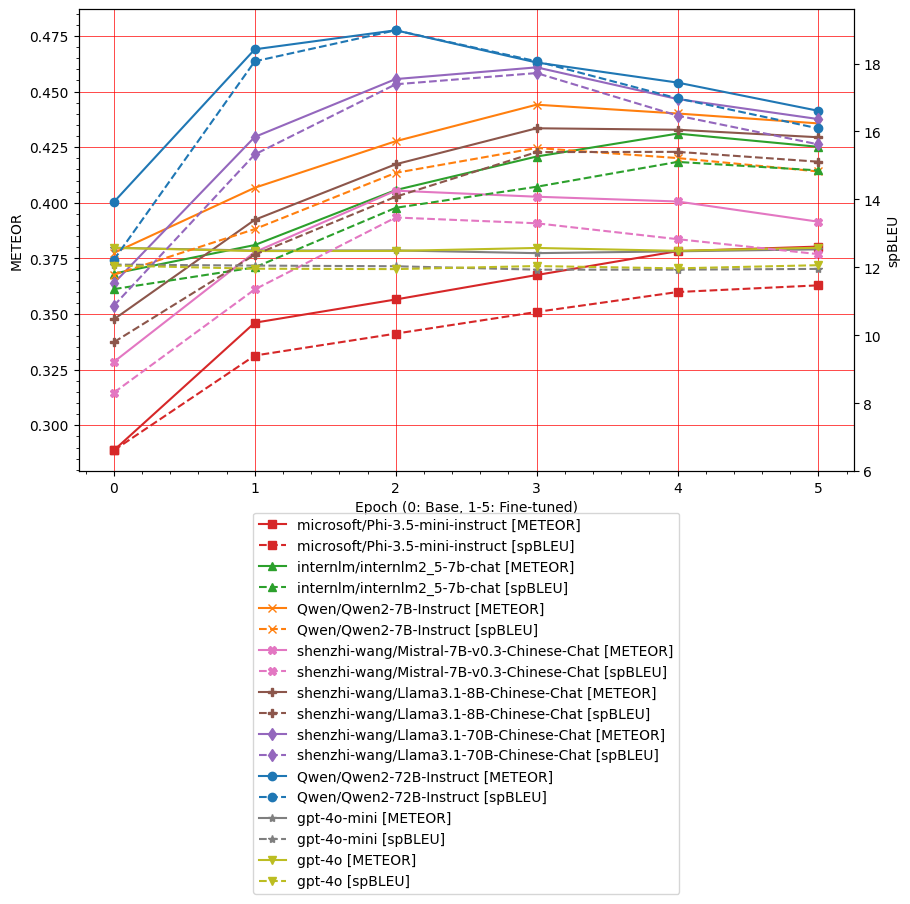

In [23]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["meteor", "spbleu"],
    ["METEOR", "spBLEU"],
)

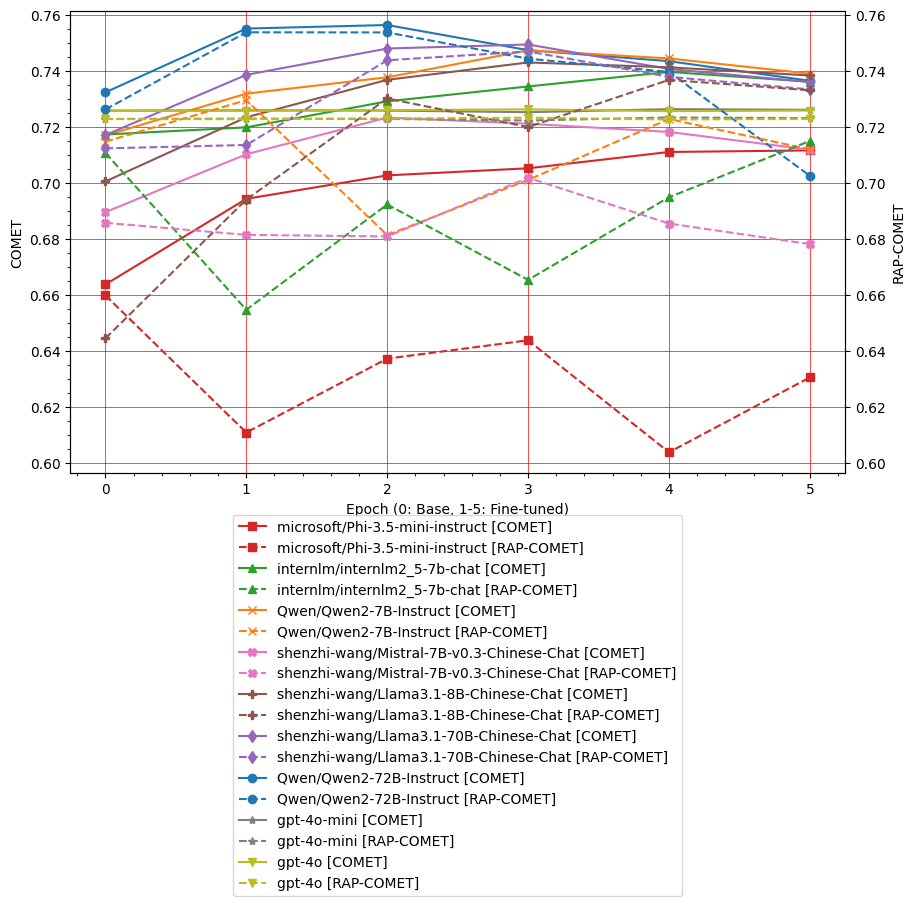

In [24]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["comet", "rap"],
    ["COMET", "RAP-COMET"],
    sync_y_axis=True,
)

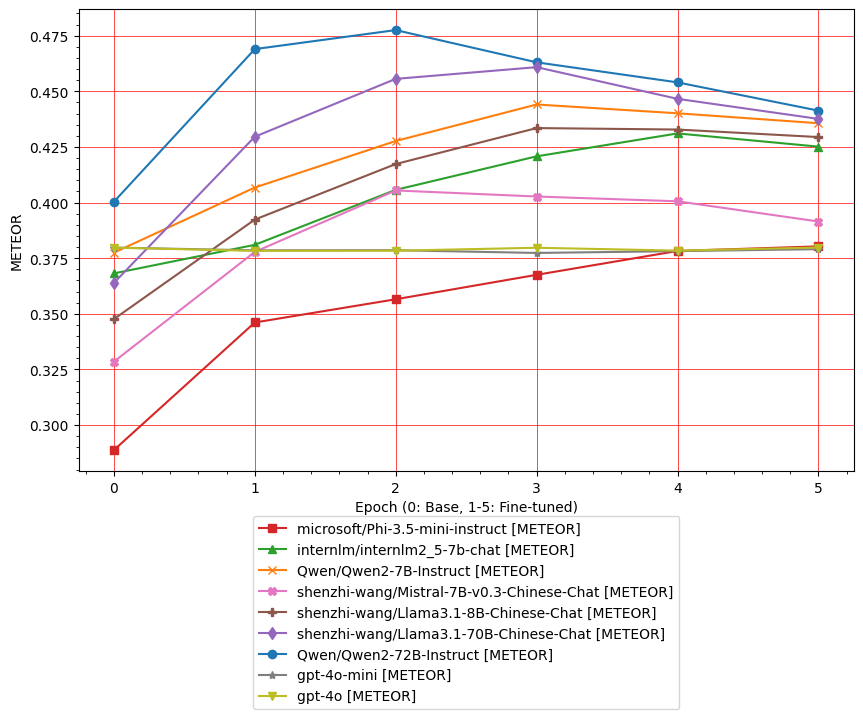

In [25]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["meteor"],
    ["METEOR"],
)

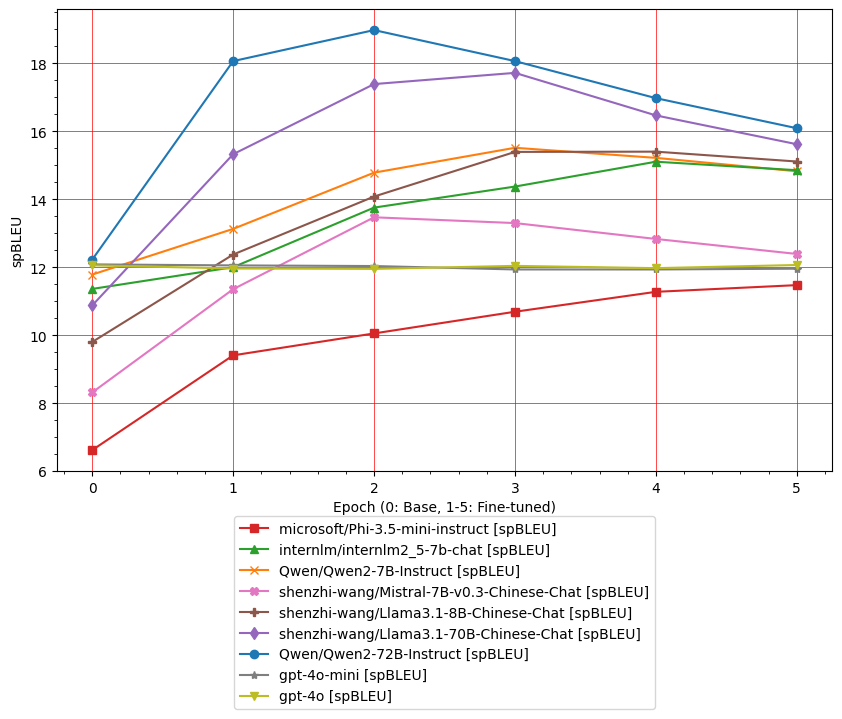

In [26]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["spbleu"],
    ["spBLEU"],
)

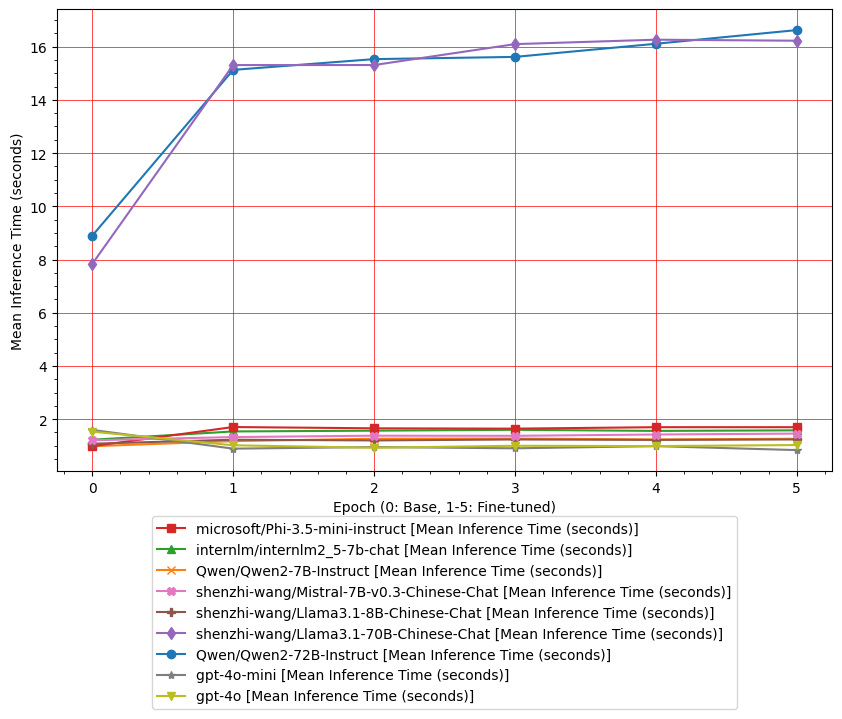

In [27]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["eval_time"],
    ["Mean Inference Time (seconds)"],
    # log_scales=[True],
)

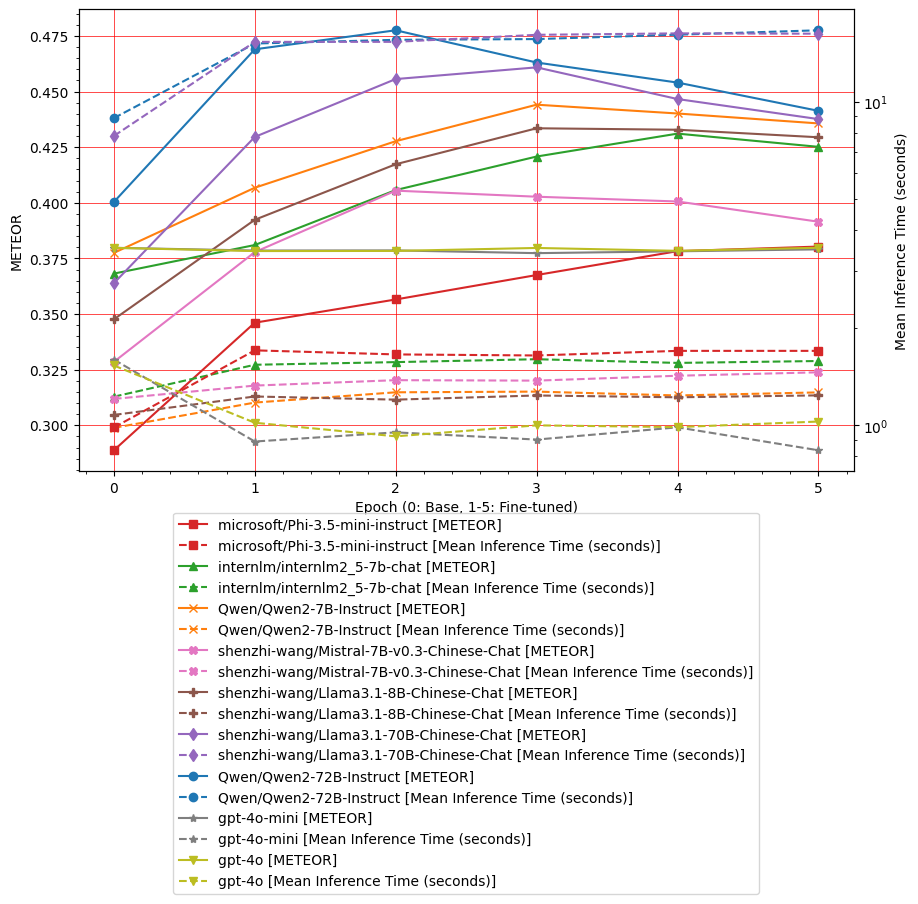

In [28]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["meteor", "eval_time"],
    ["METEOR", "Mean Inference Time (seconds)"],
    log_scales=[False, True],
)

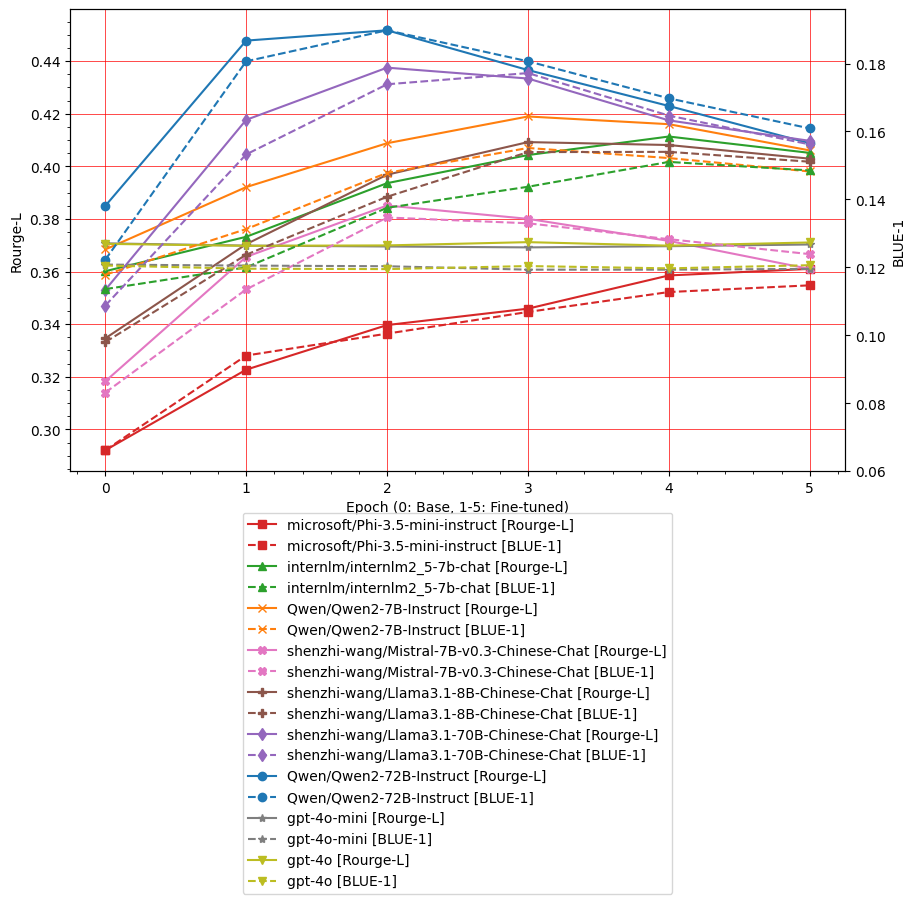

In [29]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["rouge_l", "bleu_1"],
    ["Rourge-L", "BLUE-1"],
)

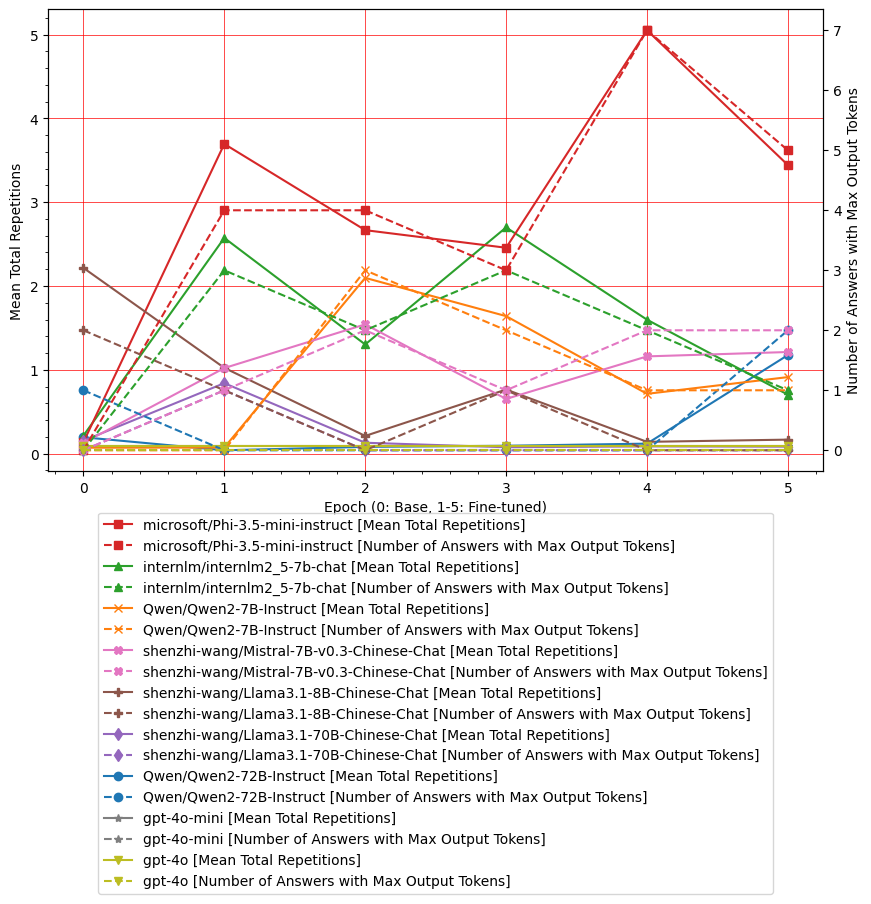

In [30]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["total_repetitions", "num_max_output_tokens"],
    ["Mean Total Repetitions", "Number of Answers with Max Output Tokens"],
)

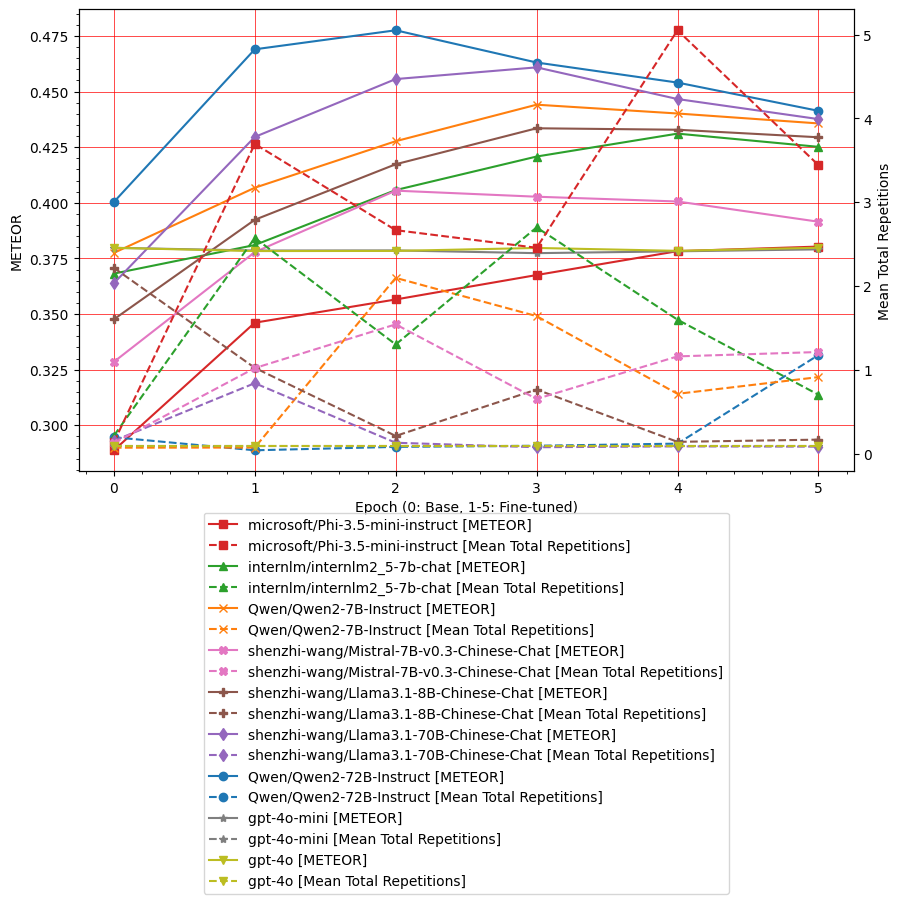

In [31]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["meteor", "total_repetitions"],
    ["METEOR", "Mean Total Repetitions"],
)

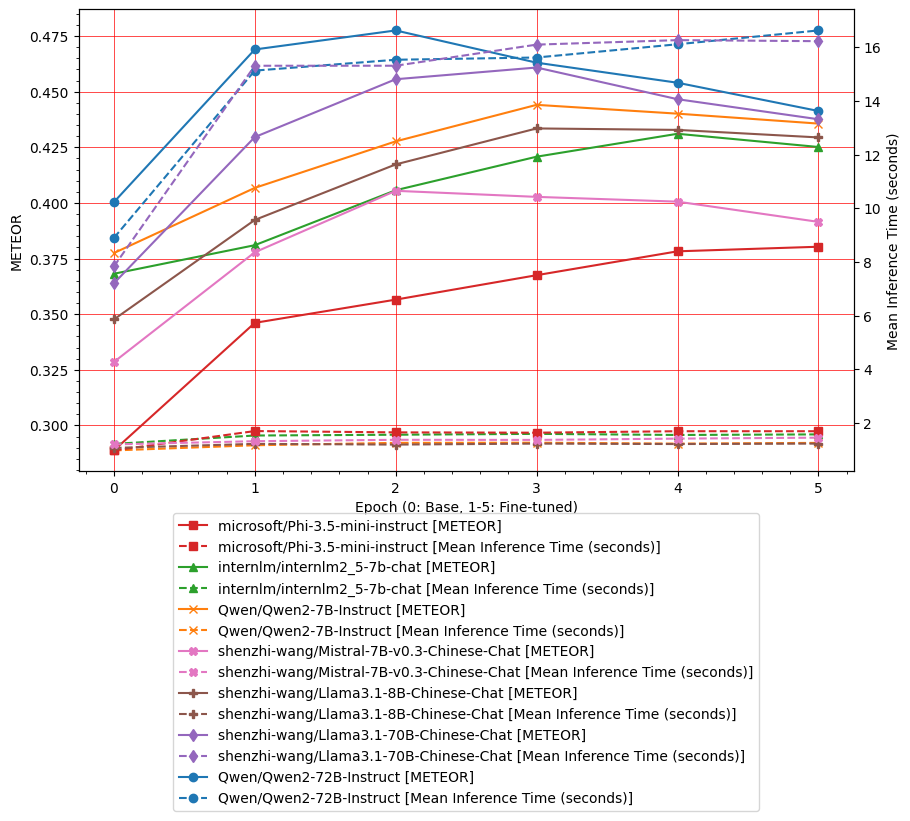

In [32]:
plot_metrics_vs_shots(
    metrics_df,
    models[:-2],
    markers,
    ["meteor", "eval_time"],
    ["METEOR", "Mean Inference Time (seconds)"],
    bbox_to_anchor=(0.5, -0.75),
)

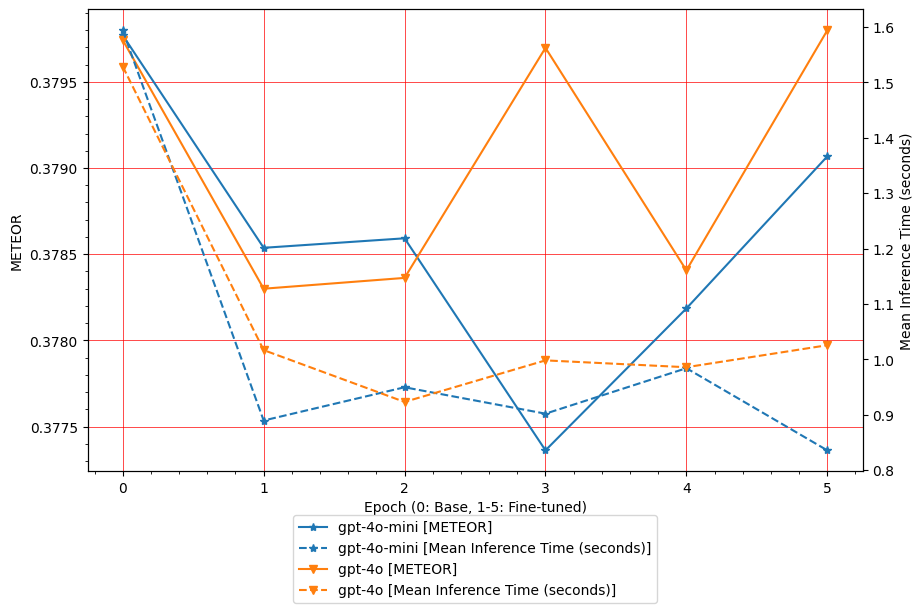

In [33]:
plot_metrics_vs_shots(
    metrics_df,
    ["gpt-4o-mini", "gpt-4o"],
    markers,
    ["meteor", "eval_time"],
    ["METEOR", "Mean Inference Time (seconds)"],
    bbox_to_anchor=(0.5, -0.3),
)

In [34]:
metrics_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, 0 to 50
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   model                     62 non-null     object 
 1   epochs                    62 non-null     int64  
 2   comet                     62 non-null     float64
 3   meteor                    62 non-null     float64
 4   spbleu                    62 non-null     float64
 5   bleu_1                    62 non-null     float64
 6   rouge_l                   62 non-null     float64
 7   ews_score                 62 non-null     float64
 8   repetition_score          62 non-null     float64
 9   total_repetitions         62 non-null     float64
 10  rap                       62 non-null     float64
 11  translation_completeness  62 non-null     float64
 12  num_max_output_tokens     62 non-null     int64  
 13  eval_time                 62 non-null     float64
 14  translation_speed

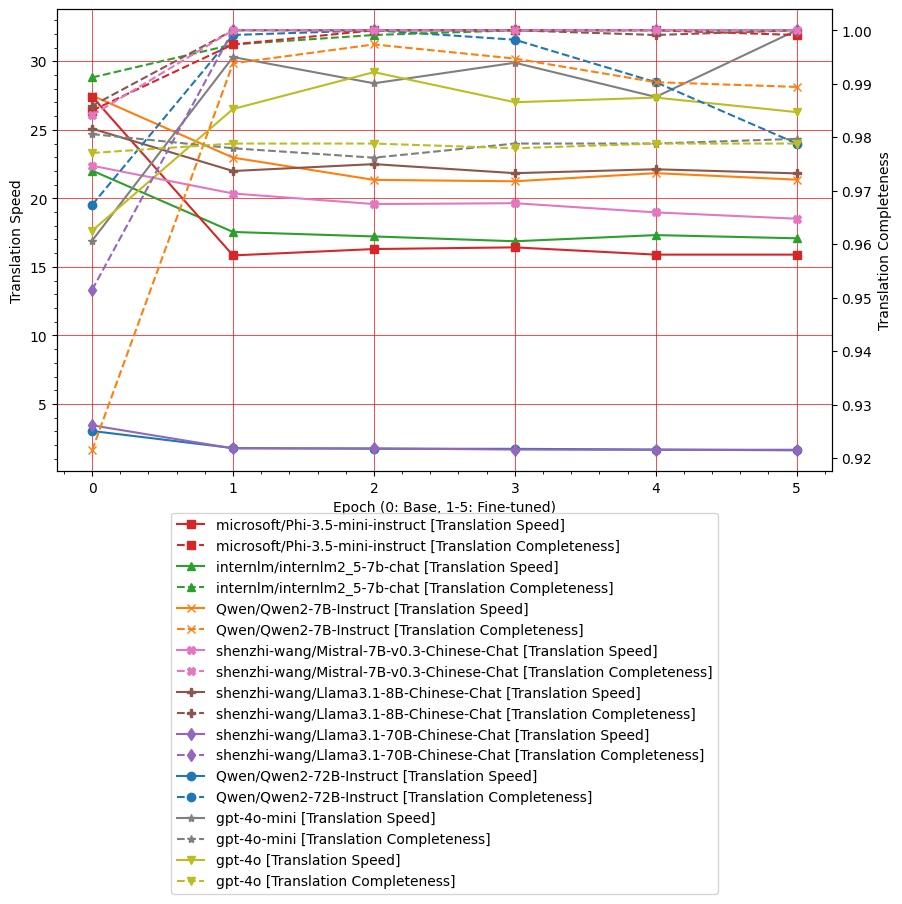

In [35]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["translation_speed", "translation_completeness"],
    ["Translation Speed", "Translation Completeness"],
)

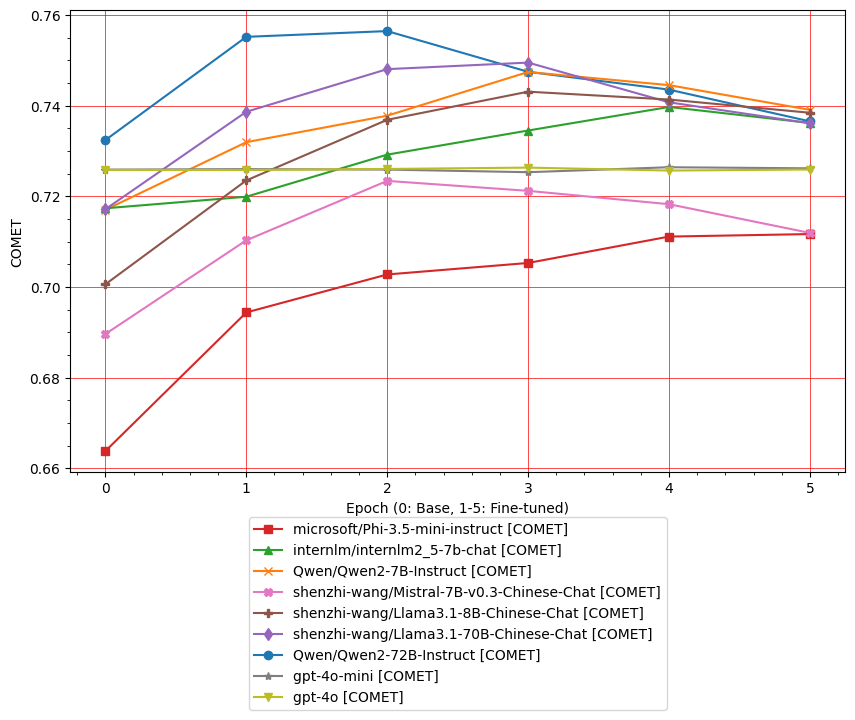

In [42]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["comet"],
    ["COMET"],
)

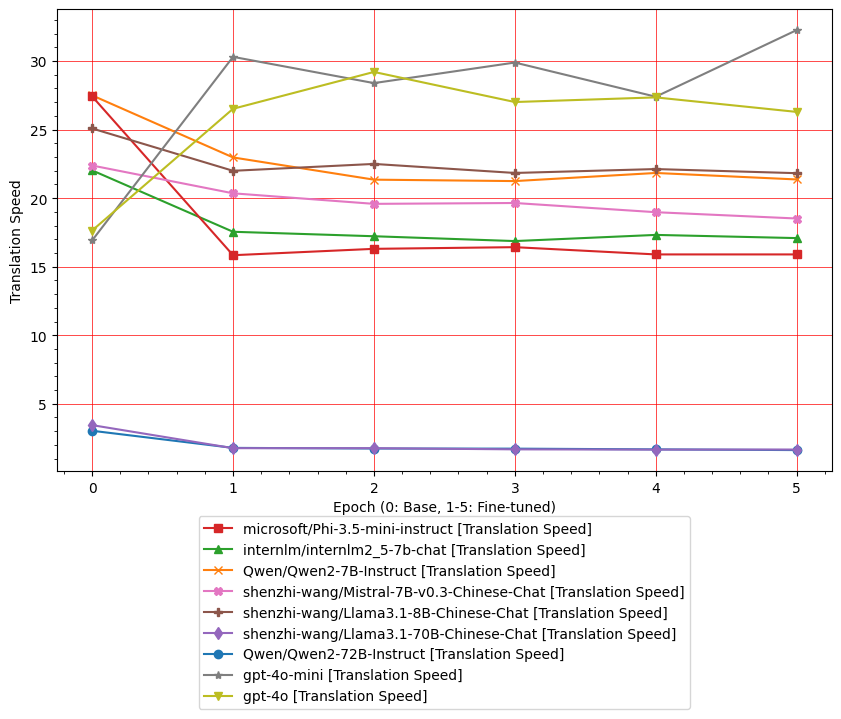

In [36]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["translation_speed"],
    ["Translation Speed"],
)

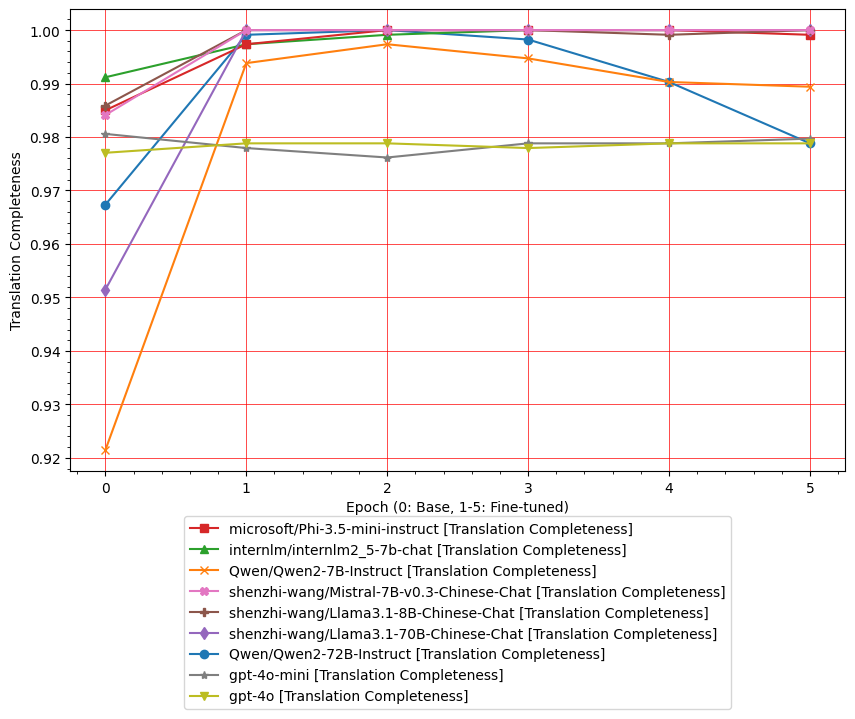

In [37]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["translation_completeness"],
    ["Translation Completeness"],
)

In [38]:
for col in result_columns:
    print(f"### Analyzing: {col}")
    analyze_translation_results(df, col, repetition_threshold=50)

### Analyzing: Qwen/Qwen2-72B-Instruct/epochs-01
*** Found 0 rows with total_repetitions > 50 for Qwen/Qwen2-72B-Instruct/epochs-01

*** Found 0 rows with output_tokens >= 300 for Qwen/Qwen2-72B-Instruct/epochs-01

*** Found 1 rows with incomplete translations for Qwen/Qwen2-72B-Instruct/epochs-01
--------------------------------------------------
chinese: 天地会的会众多是江湖豪杰，赌钱酗酒，乃是天性，向来不以为非，总舵主也就不再理会，向他凝视片刻，道：“你愿不愿拜我为师？”
--------------------------------------------------
english: Since most members of the Society came from a travelling background in which gambling and drunken brawling were accepted as normal behaviour, the Helmsman was inclined to turn a blind eye on these matters. He looked at Trinket intently for some moments as if trying to make his mind up about something. 'Would you like to be my apprentice?'
--------------------------------------------------
Qwen/Qwen2-72B-Instruct/epochs-01: The Triads were mostly made up of men who had spent their lives in the world of the江湖, and ga

In [39]:
metrics_df.to_csv(metrics_csv, index=False)

In [40]:
metrics_df.describe()

epochs      comet     meteor     spbleu     bleu_1    rouge_l  \
count  62.000000  62.000000  62.000000  62.000000  62.000000  62.000000   
mean    2.951613   0.727035   0.403032  13.353383   0.133534   0.384628   
std     1.995301   0.016449   0.036983   2.473441   0.024734   0.031759   
min     0.000000   0.663802   0.288749   6.616686   0.066167   0.292053   
25%     1.000000   0.718669   0.378439  11.937434   0.119374   0.369284   
50%     3.000000   0.726370   0.400474  12.610388   0.126104   0.376640   
75%     5.000000   0.738264   0.432403  15.109030   0.151090   0.408043   
max     6.000000   0.756442   0.477542  18.979032   0.189790   0.451748   

       ews_score  repetition_score  total_repetitions        rap  \
count       62.0         62.000000          62.000000  62.000000   
mean         0.0          0.868562           0.868562   0.704466   
std          0.0          1.157866           1.157866   0.035988   
min          0.0          0.040600           0.040600   0.603897   
25%          0.0          0.095322           0.095322   0.685630   
50%          0.0          0.181818           0.181818   0.721143   
75%          0.0          1.203663           1.203663   0.724409   
max          0.0          5.050309           5.050309   0.753846   

       translation_completeness  num_max_output_tokens  eval_time  \
count                 62.000000              62.000000  62.000000   
mean                   0.990163               1.080645   4.352661   
std                    0.014118               1.581640   5.877535   
min                    0.921447               0.000000   0.832304   
25%                    0.979038               0.000000   1.200132   
50%                    0.997793               0.000000   1.398941   
75%                    1.000000               2.000000   1.700353   
max                    1.000000               7.000000  16.712268   

       translation_speed  
count          62.000000  
mean           17.421521  
std             9.436563  
min             1.613414  
25%            15.857802  
50%            19.279244  
75%            22.467477  
max            32.396607

In [41]:
df.describe()

ground_truth_ews_score  ground_truth_repetition_score  \
count                  1133.0                    1133.000000   
mean                      0.0                       0.312445   
std                       0.0                       7.193649   
min                       0.0                       0.000000   
25%                       0.0                       0.000000   
50%                       0.0                       0.000000   
75%                       0.0                       0.000000   
max                       0.0                     239.000000   

       ground_truth_total_repetitions  count_chinese_characters-ground_truth  \
count                     1133.000000                            1133.000000   
mean                         0.312445                              26.963813   
std                          7.193649                              19.069510   
min                          0.000000                               2.000000   
25%                          0.000000                              14.000000   
50%                          0.000000                              22.000000   
75%                          0.000000                              35.000000   
max                        239.000000                             143.000000   

       ews_score  repetition_score  total_repetitions  \
count     1133.0       1133.000000        1133.000000   
mean         0.0          0.095322           0.095322   
std          0.0          1.469269           1.469269   
min          0.0          0.000000           0.000000   
25%          0.0          0.000000           0.000000   
50%          0.0          0.000000           0.000000   
75%          0.0          0.000000           0.000000   
max          0.0         32.000000          32.000000   

       ground_truth_tokens-Qwen/Qwen2-72B-Instruct  \
count                                  1133.000000   
mean                                     29.458076   
std                                      20.126659   
min                                       1.000000   
25%                                      16.000000   
50%                                      25.000000   
75%                                      38.000000   
max                                     135.000000   

       count_chinese_characters-Qwen/Qwen2-72B-Instruct/epochs-01  \
count                                        1133.000000            
mean                                            0.000883            
std                                             0.029709            
min                                             0.000000            
25%                                             0.000000            
50%                                             0.000000            
75%                                             0.000000            
max                                             1.000000            

       output_tokens-Qwen/Qwen2-72B-Instruct/epochs-01  ...  \
count                                      1133.000000  ...   
mean                                         26.533981  ...   
std                                          17.928153  ...   
min                                           1.000000  ...   
25%                                          14.000000  ...   
50%                                          22.000000  ...   
75%                                          34.000000  ...   
max                                         117.000000  ...   

       count_chinese_characters-gpt-4o/epochs-01  \
count                                1133.000000   
mean                                    0.021183   
std                                     0.144057   
min                                     0.000000   
25%                                     0.000000   
50%                                     0.000000   
75%                                     0.000000   
max                                     1.000000   

       output_tokens-gpt-4o/epochs-01  \
count   